In [1]:
import pandas as pd
import numpy as np
import os as os
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.util import ngrams
import acessos as ac
from arabica import arabica_freq
import unidecode
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
nps = pd.read_csv('nps.csv')

In [8]:
len(nps)

140932

In [10]:
nps = nps.query('tag_top_1 != ""')
len(nps)

140932

In [25]:
stopwords_will= ['da','a', 'do','em','as','os' , 'em', 'você', 'de', 'ao', 'os', 'que', 'e', 'eu', 'o', 'estou', 'ele','ela','pra', 'pro', 'entao', 'para', 'voce',
            'seu', 'sua', 'por', 'sobre', 'mais', 'uma', 'um', 'ta', 'to', 'ai', 'la', 'lo', 'lhe', 'ne','pra', 'tá', 'ne', 'ah', 'aí', "ai", 'dá', 'ó', 
            'mim', 'então', 'aqui', 'tô', 'pro', 'isso', "will", "bank", "willbank", "vcs", "dei", "meu"]

In [26]:
def clean_text(x):
    x = re.sub(r'\t', ' ', x)
    x = re.sub(r'\n','', x)
    x = x.lower()
    x = unidecode.unidecode(x)
    x = re.sub(r'(\d{1,}|\!|\?|\,|\.|\\n|\:|\;|\`|\´|\-|\_)', ' ', x)  # replace punctuation and remove numbers
    x = re.sub(r'will bank', 'willbank', x)
    x = re.sub(r'(nbsp\;|[rl]dquo\;|quot\;|acute\;|tilde\;|circ\;|grave\;|cedil\;|\&|\/)', '', x)  # replace special characters
    x = x.replace('&ccedil;','ç')
    x = x.replace('&atilde;;','ã')
    x = x.replace('&otilde;;','õ')
    x = x.replace('  ',' ')
    x = x.replace('>', '')
    x = x.replace('<', '')
    x = x.replace('bot', '')
    x = x.replace('pag ', '')
    x = x.replace('will ', '')
    x = x.replace('|', '')
    
    pattern = r'\b(' + '|'.join(stopwords_will) + r')\b'
    x = re.sub(pattern, '', str(x))
    x = x.replace('  ',' ')
    x = x.strip()
    
    return x

In [35]:
def classifica_nps(x):
    if "limite de credito" in x:
        return "Aumento do limite de crédito"
    elif "limite maior" in x:
        return "Aumento do limite de crédito"
    elif "limite pouco" in x:
        return "Aumento do limite de crédito"
    elif "cartao credito limite" in x:
        return "Aumento do limite de crédito"
    elif "nao recebi o cartao" in x:
        return "Atraso de entrega"
    elif "cade meu cartao" in x:
        return "Atraso de entrega"
    #elogios no final
    elif "feliz fazer parte" in x:
        return "Elogio"
    elif "recomendo" in x:
        return "Elogio"
    elif "super indico" in x:
        return "Elogio"
    elif "super super" in x:
        return "Elogio"
    elif "otimo" in x:
        return "Elogio"
    elif "muito feliz" in x:
        return "Elogio"
    elif "super rapido" in x:
        return "Elogio"
    elif "cartao bom" in x:
        return "Elogio"    
    elif "bom cartao" in x:
        return "Elogio"
    elif "atendimento bom" in x:
        return "Elogio"
    elif "bom atendimento" in x:
        return "Elogio"
    elif "facil usar" in x:
        return "Elogio"
    elif "gostei atendimento" in x:
        return "Elogio"
    elif "achei bom" in x:
        return "Elogio"
    elif "atendimento rapido" in x:
        return "Elogio"
    elif "muito facil" in x:
        return "Elogio"
    elif "gostei muito" in x:
        return "Elogio"
    elif "excelente" in x:
        return "Elogio"
    elif "satisfeito" in x:
        return "Elogio"
    elif "adorei" in x:
        return "Elogio"
    elif "adorando" in x:
        return "Elogio"
    elif "muito bom" in x:
        return "Elogio"
    elif "parabens" in x:
        return "Elogio"
    elif "obrigado" in x:
        return "Elogio"
    elif "amei" in x:
        return "Elogio"
    elif "amo" in x:
        return "Elogio"
    elif "rapidez aprovar" in x:
        return "Elogio"
    elif "rapidez atendimento" in x:
        return "Elogio"
    elif "muito rapido" in x:
        return "Elogio"
    elif "facilidade" in x:
        return "Elogio"
    elif "praticidade" in x:
        return "Elogio"
    elif "facil de mexer" in x:
        return "Elogio"
    elif "facil de usar" in x:
        return "Elogio"
    elif "incrivel" in x:
        return "Elogio"
    elif "cada vez melhor" in x:
        return "Elogio"
    elif "agradou" in x:
        return "Elogio"
    elif "rapidez processo" in x:
        return "Elogio"
    elif "melhor cartao" in x:
        return "Elogio"
    elif "vcs sao demais" in x:
        return "Elogio"
    elif "maravilhoso" in x:
        return "Elogio"
    elif "amando" in x:
        return "Elogio"
    elif "gostei" in x:
        return "Elogio"
    elif "show" in x:
        return "Elogio"
    elif "rapidez" in x:
        return "Elogio"
    elif "foi rapido" in x:
        return "Elogio"
    elif "agilidade" in x:
        return "Elogio"
    elif "dez" in x:
        return "Elogio"
    elif "muito pratico" in x:
        return "Elogio"
    elif "estou gostando do cartao" in x:
        return "Elogio"

In [36]:
nps['text_clean'] = nps['text'].astype('string')

nps_clean = nps[~nps.text_clean.isnull()]
nps_clean['text_clean'] = nps_clean['text_clean'].apply(clean_text)
nps_clean['Tag_Clean'] = np.where(nps_clean['text_clean'].apply(classifica_nps).isna(), nps_clean['tag_top_1'], nps_clean['text_clean'].apply(classifica_nps) )



/tmp/ipykernel_1270911/123909870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_1270911/123909870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Generating Histogram


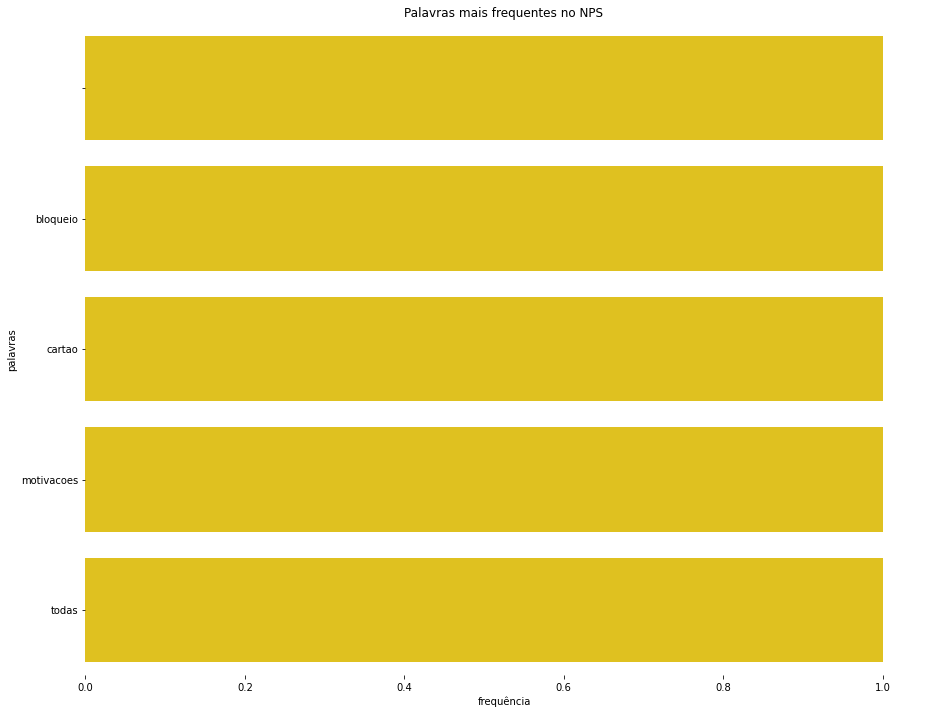

In [38]:
print("Generating Histogram")
texto = nps_clean[nps_clean.Tag_Clean == i]['text_clean']
all_other = " ".join(s for s in texto)
list_all_name_clean = all_other.split(' ')

list_all_name_clean2 = [palavra for palavra in list_all_name_clean if palavra.lower() not in stopwords_will]

df_words = pd.DataFrame(list_all_name_clean2, columns=['words'])
df_count = df_words.value_counts().to_frame()
df_count.reset_index(inplace = True)
df_count.rename(columns={0:'frequência', 'words':'palavras'}, inplace=True)
top15 = df_count.iloc[:15]

ax = sns.barplot(x='frequência',y='palavras', data=top15, color = 'gold').set_title('Palavras mais frequentes no NPS')
ax.figure.set_size_inches(15, 12)
sns.despine(left=True, bottom=True)


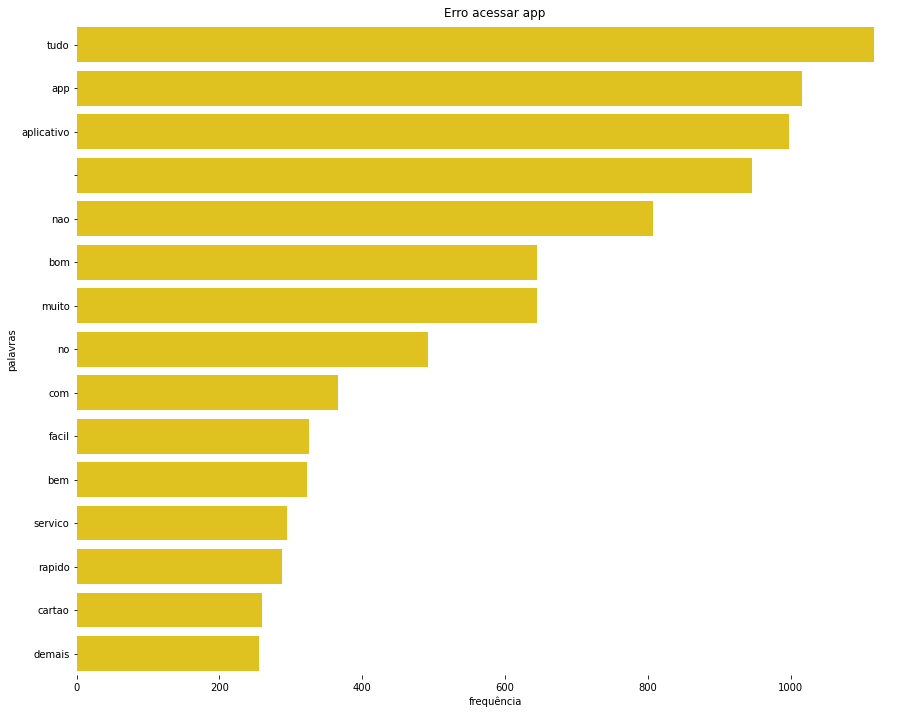

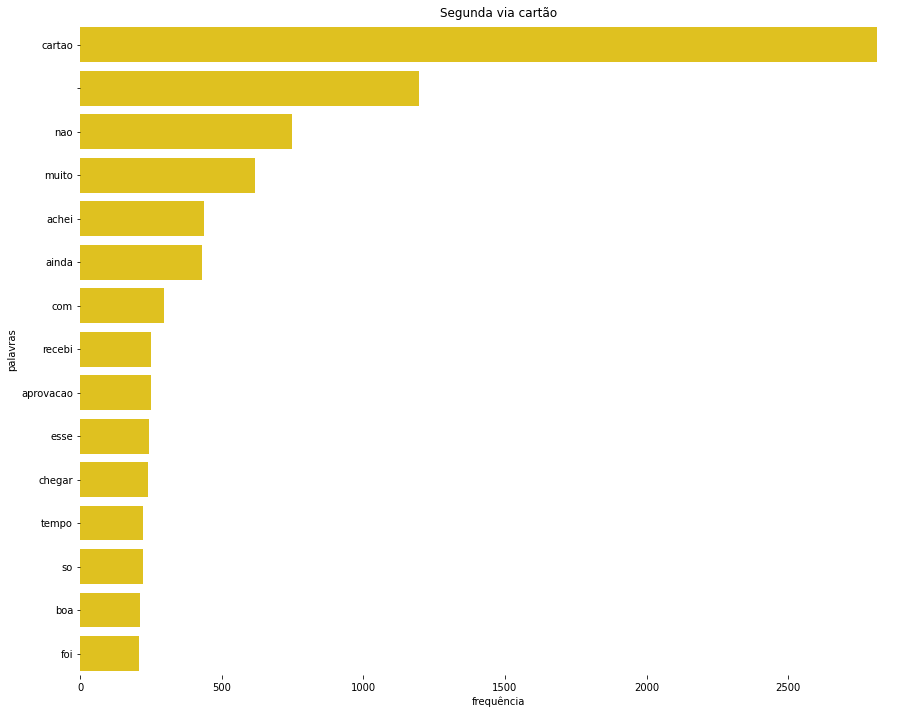

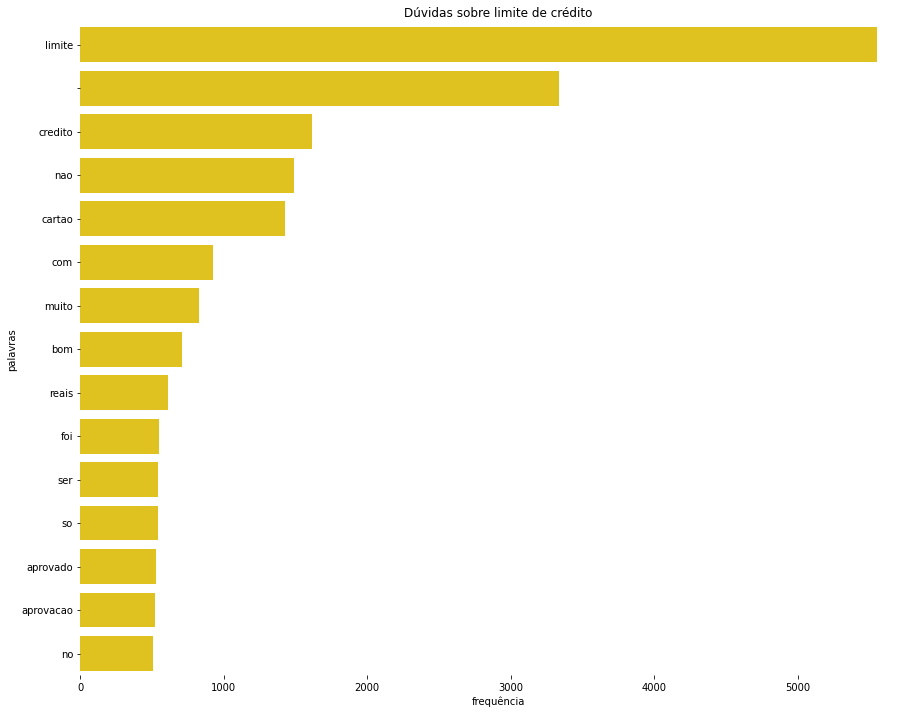

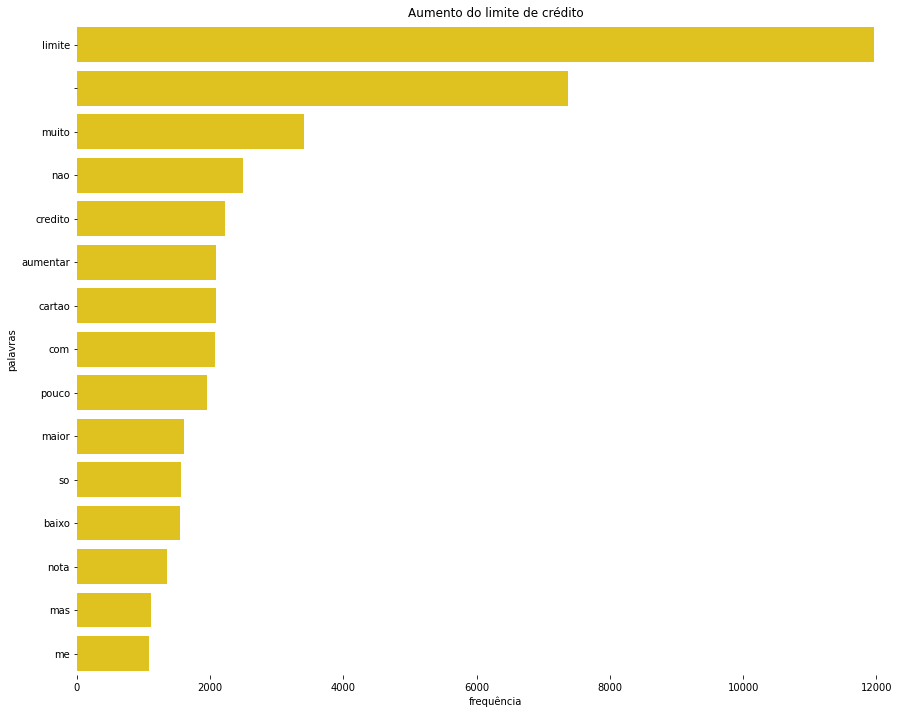

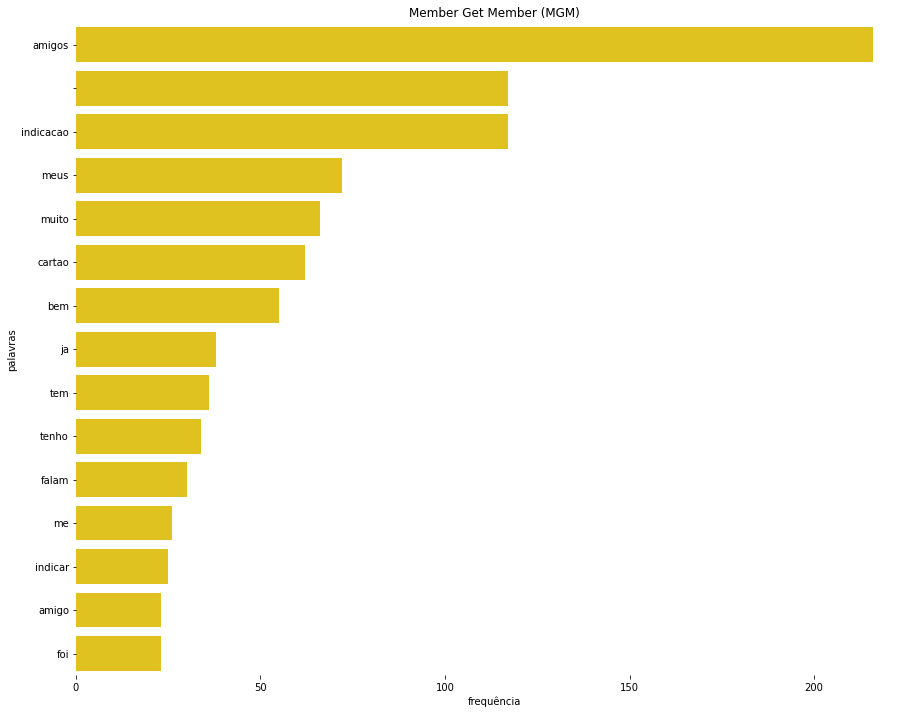

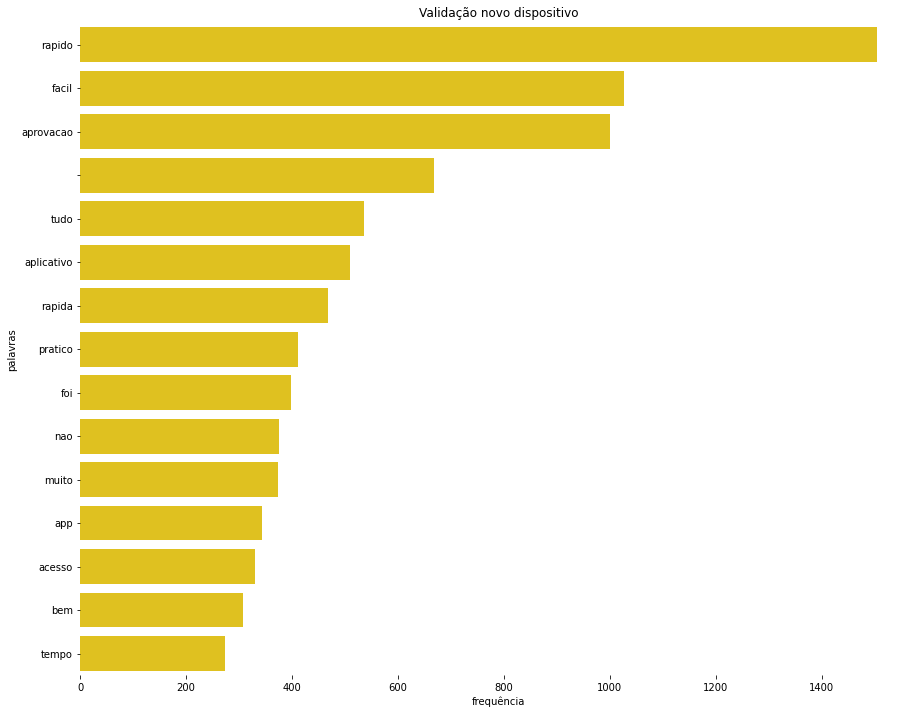

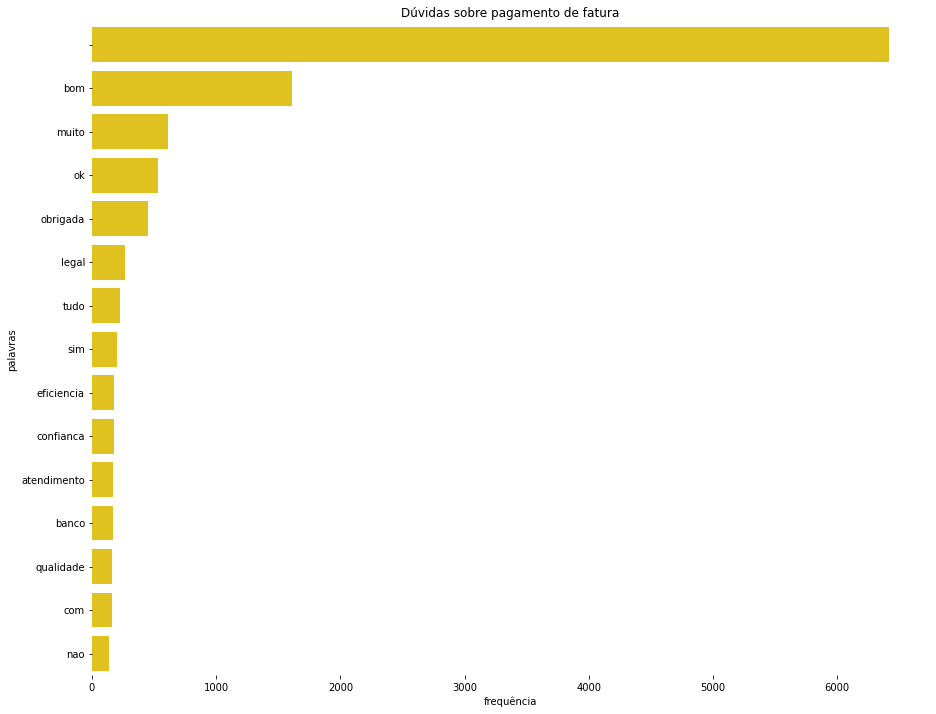

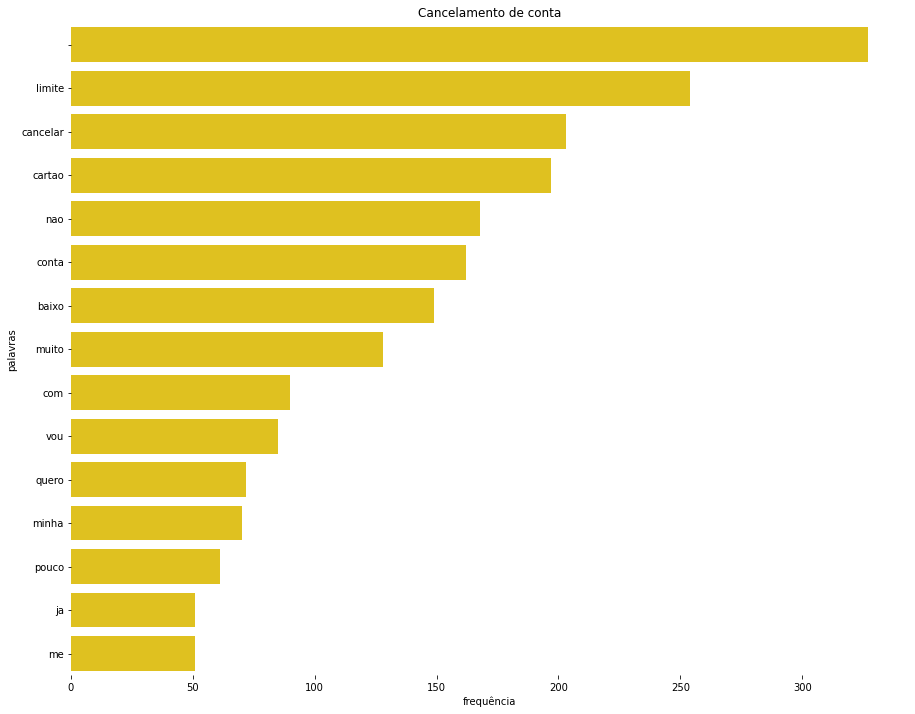

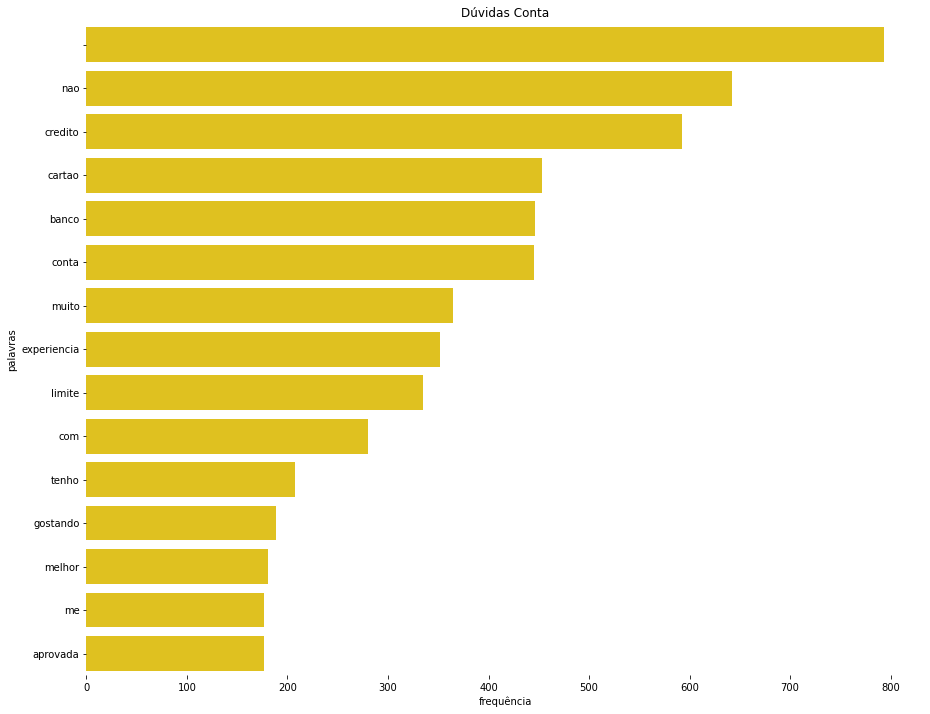

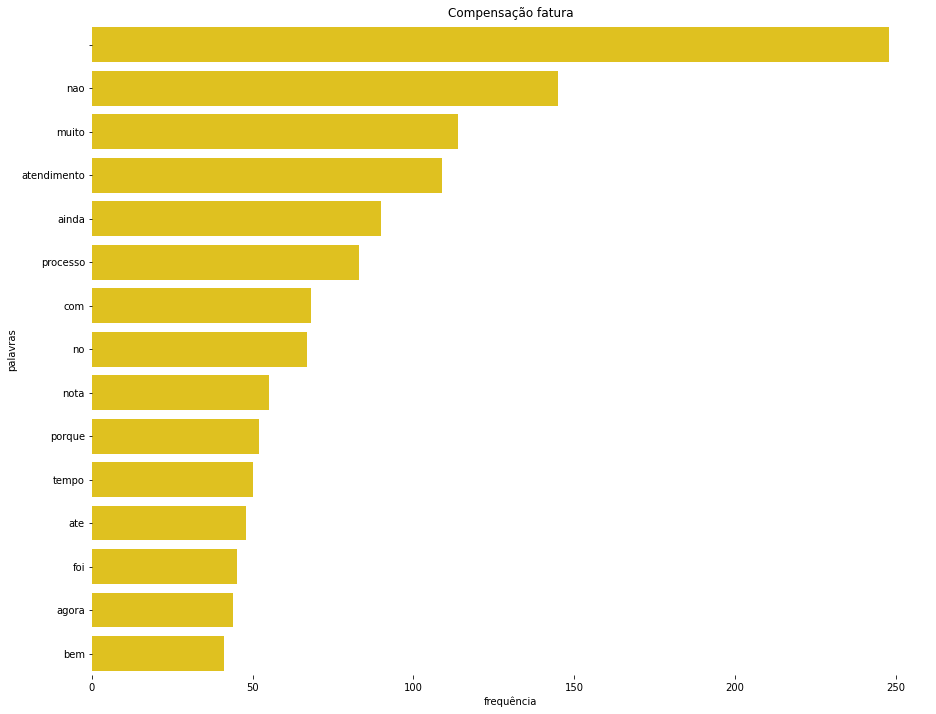

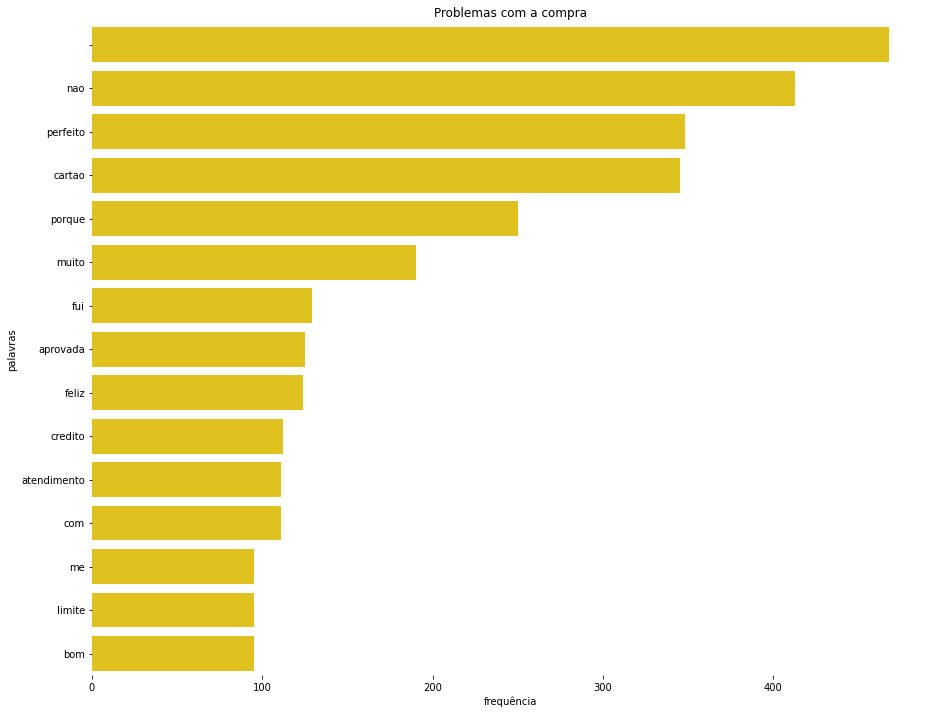

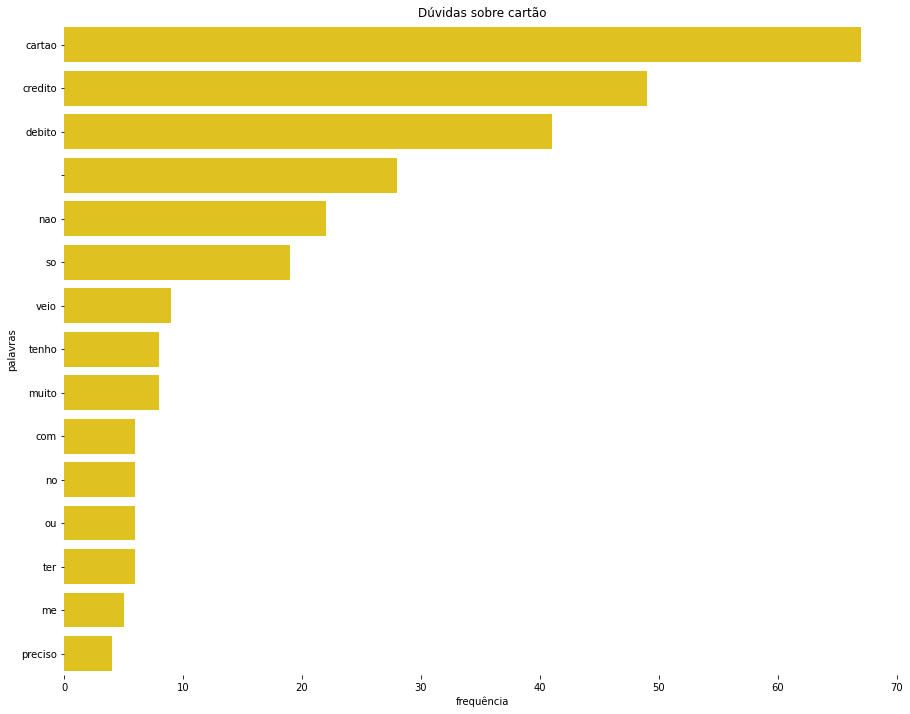

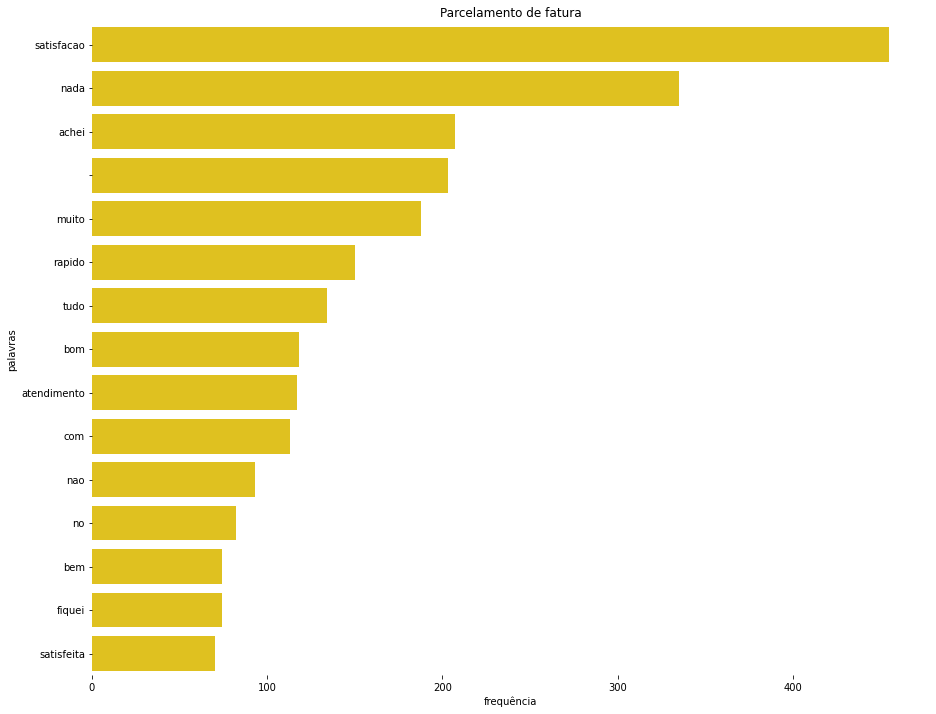

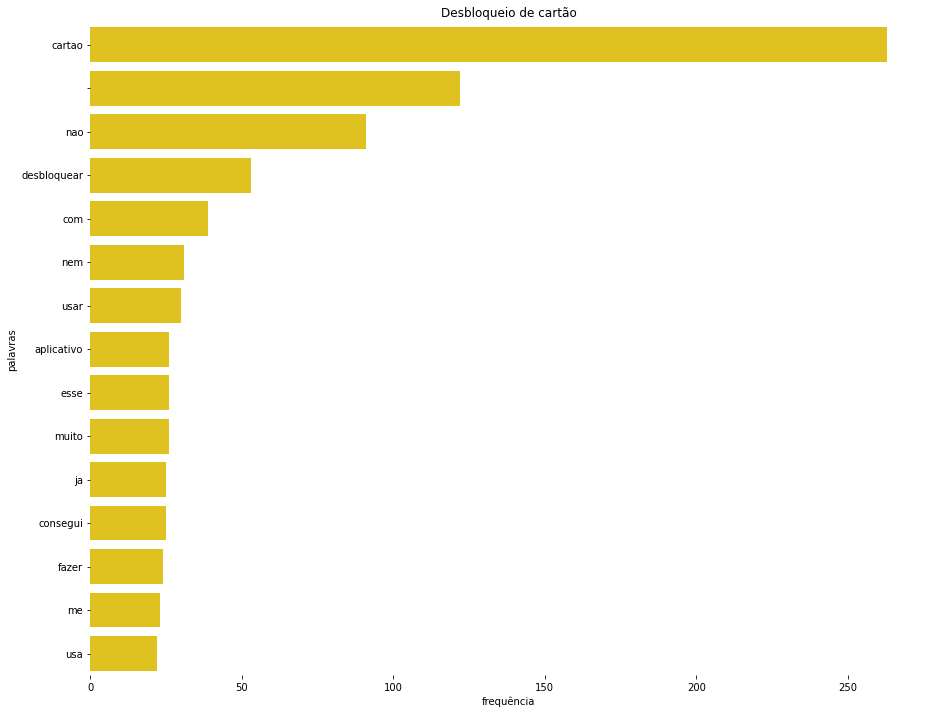

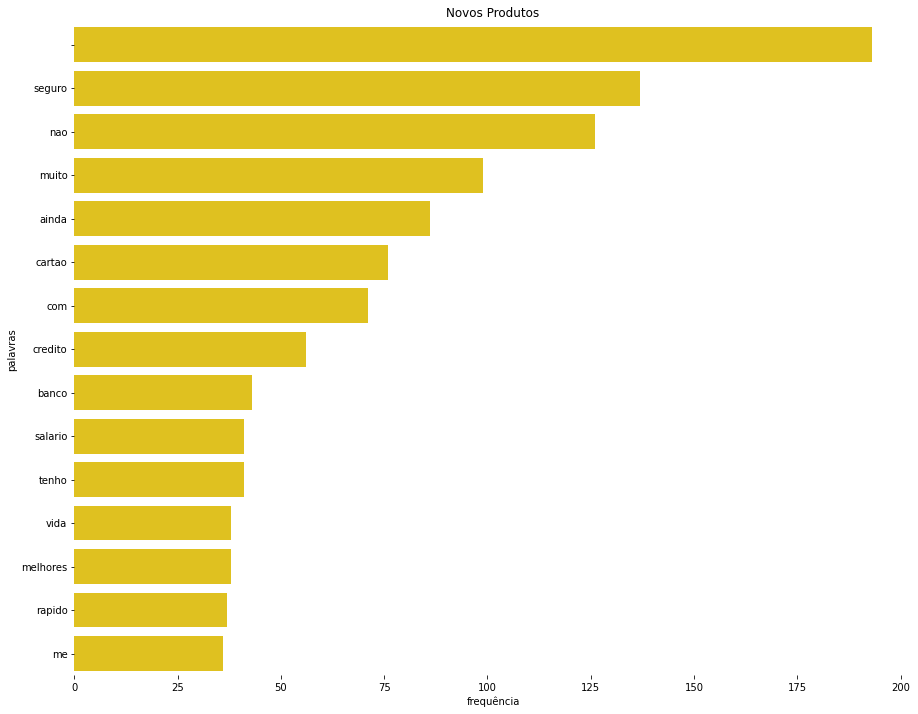

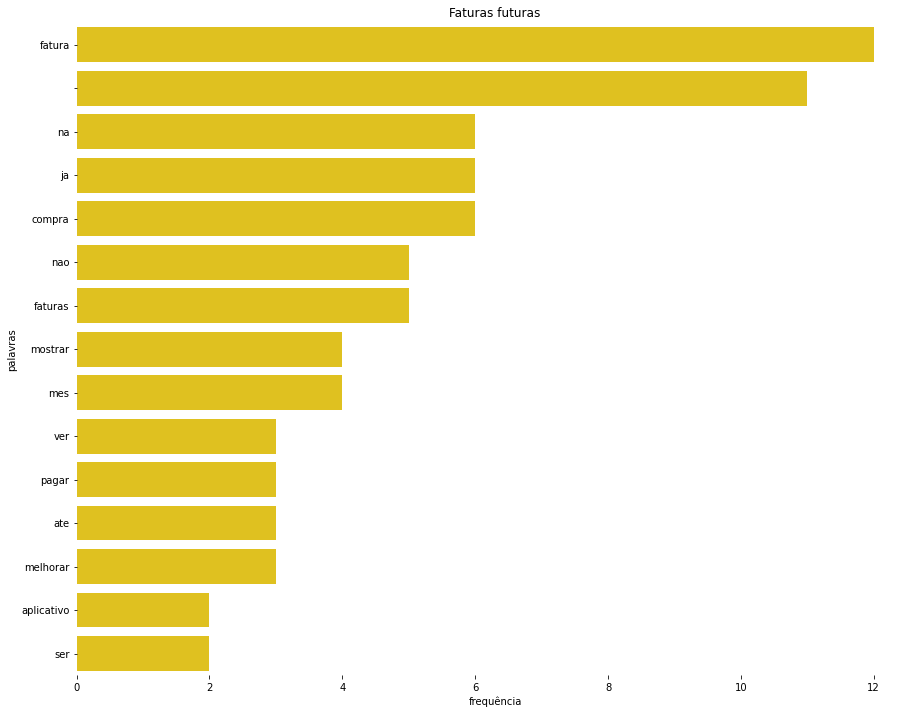

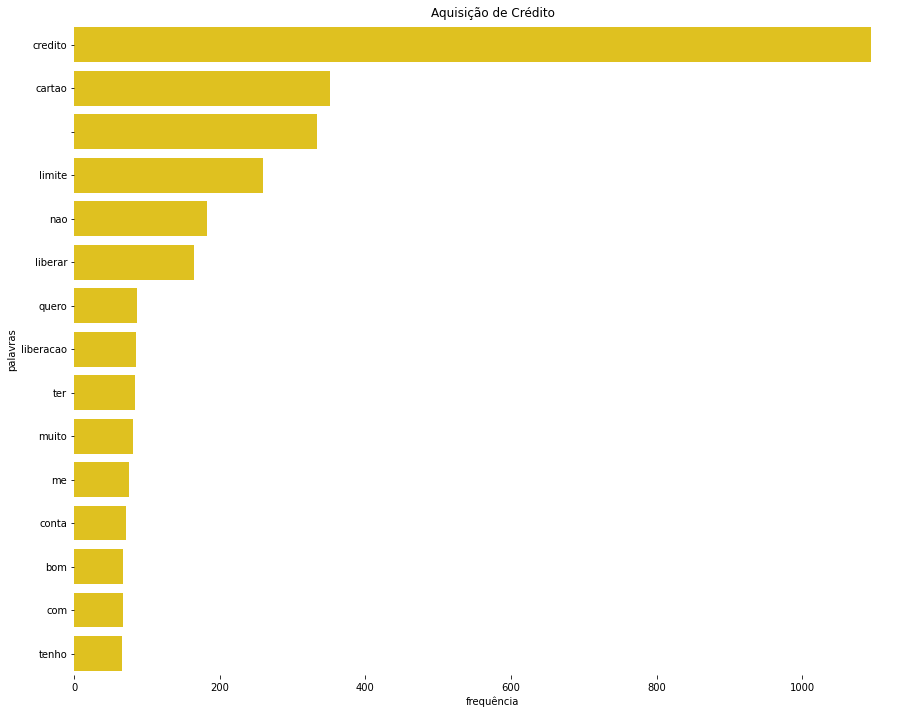

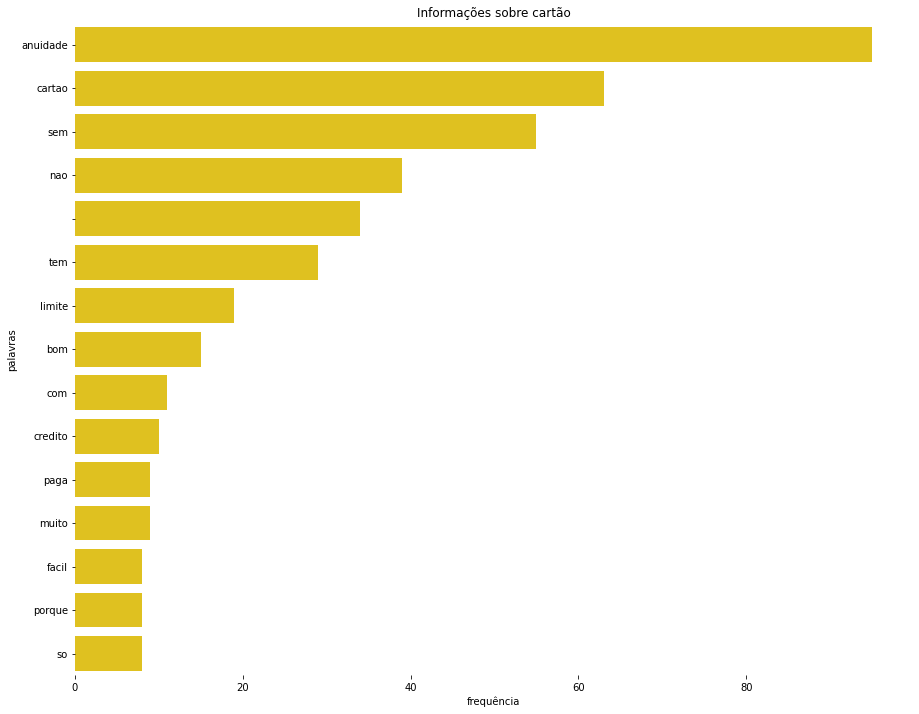

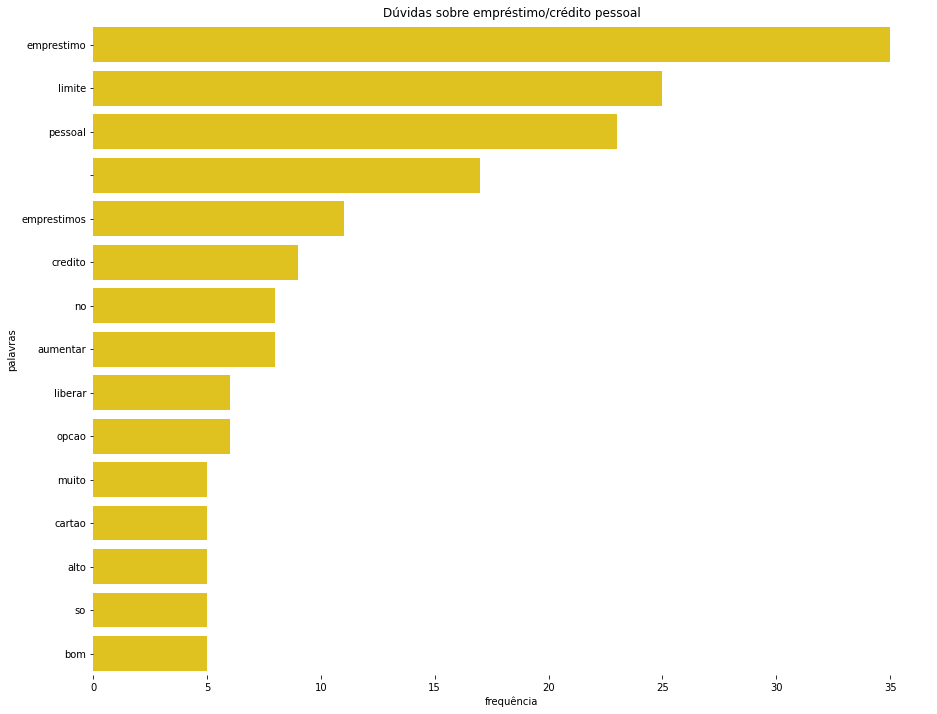

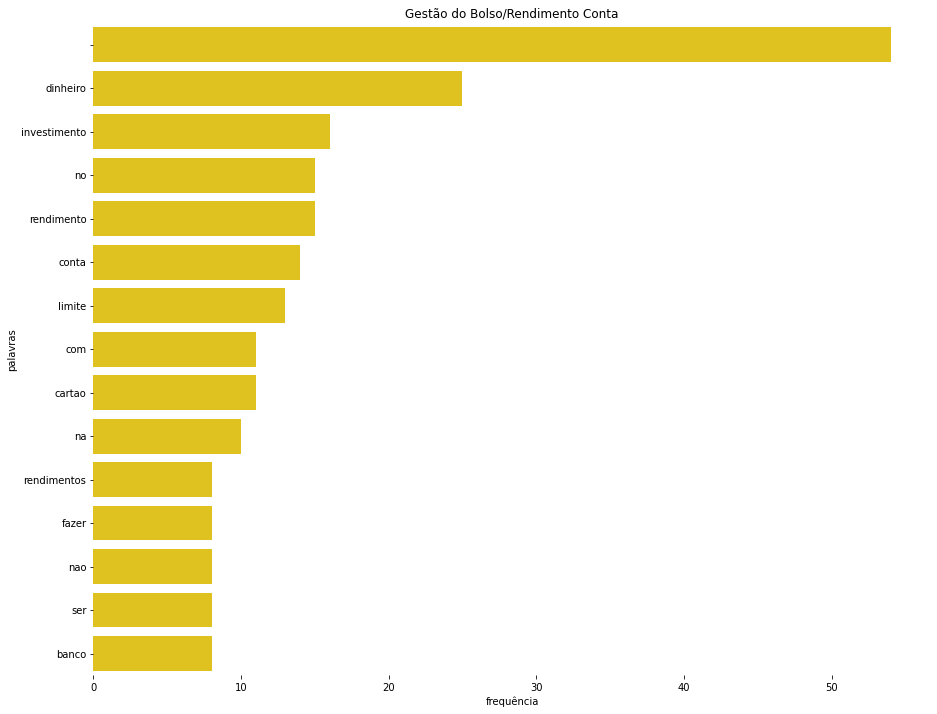

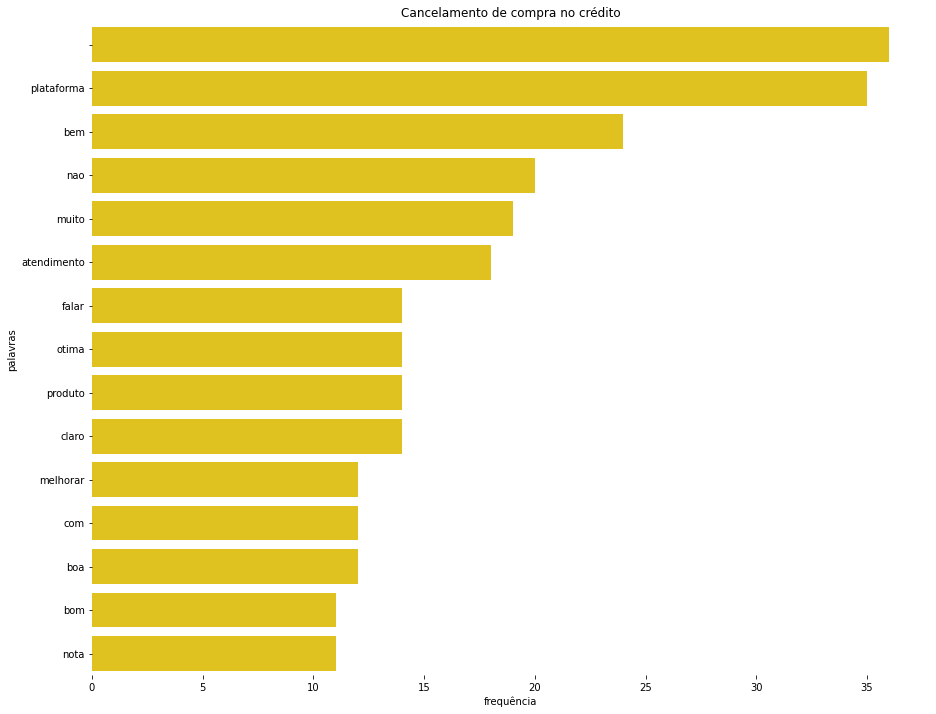

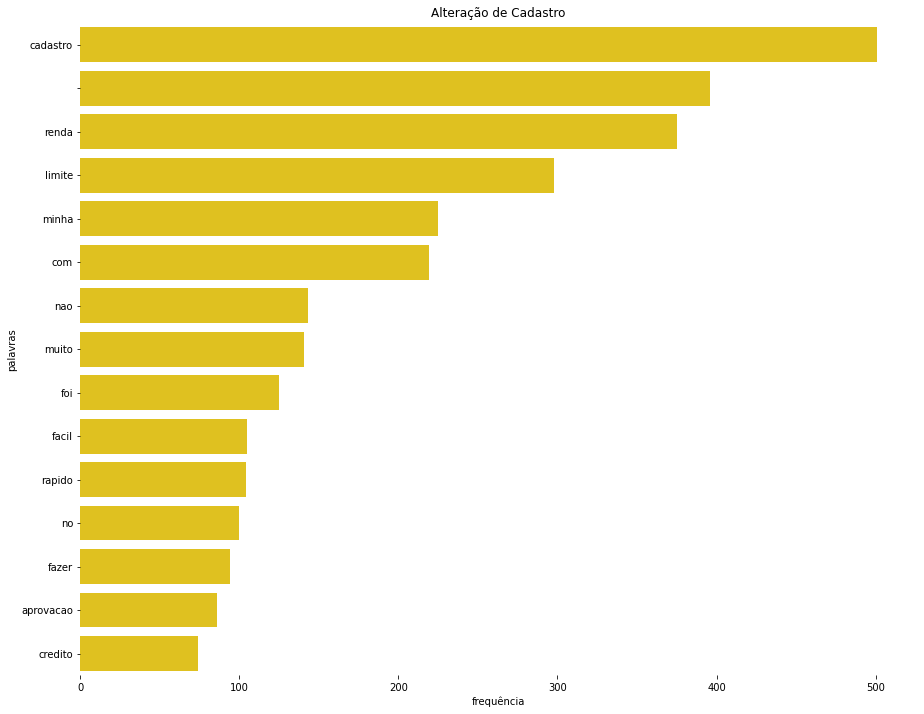

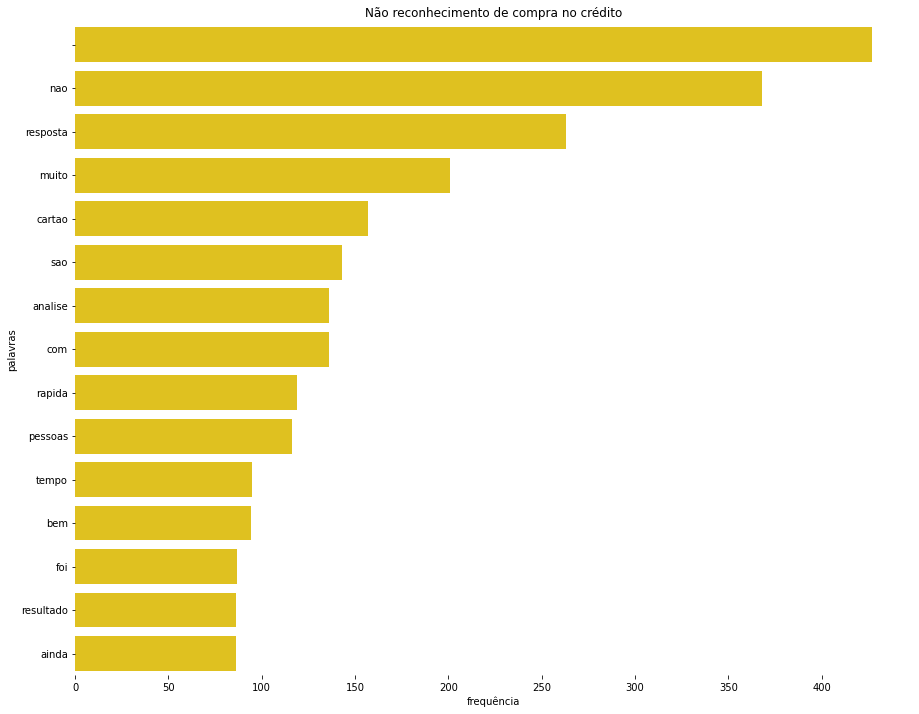

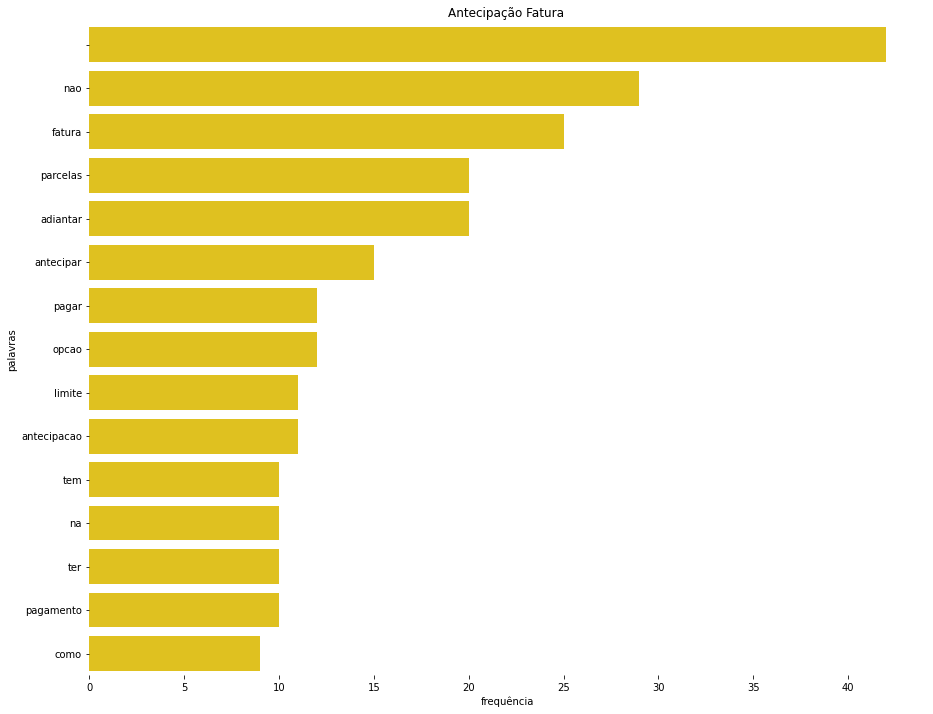

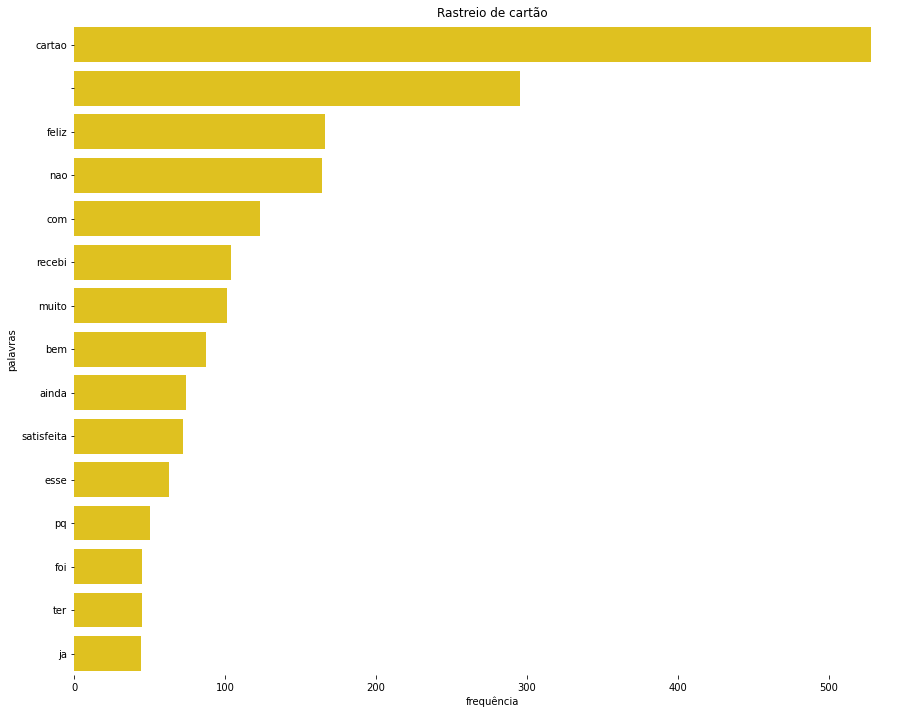

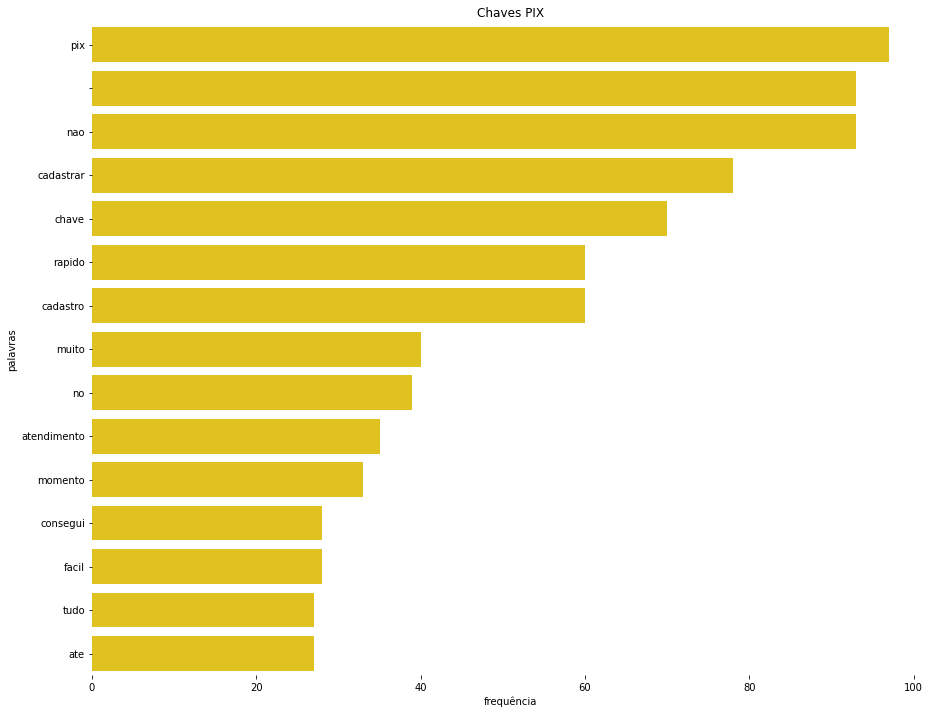

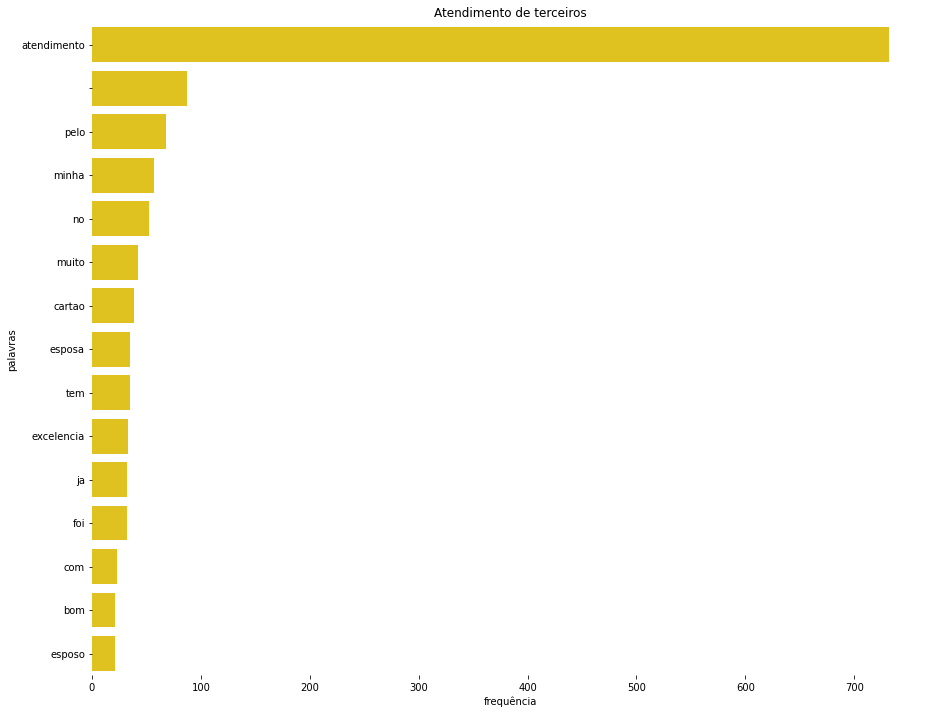

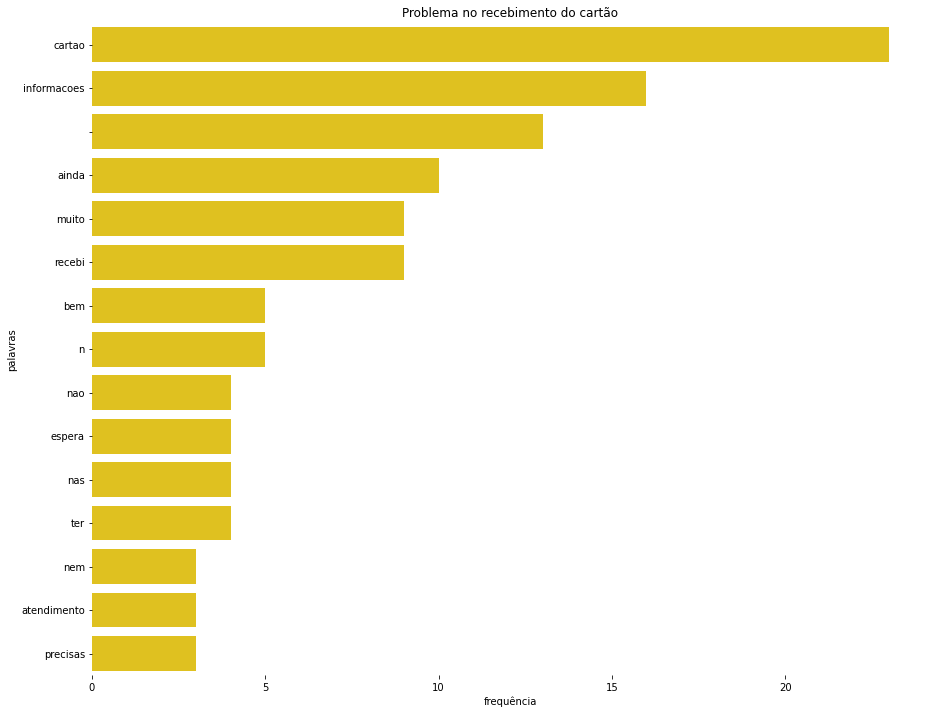

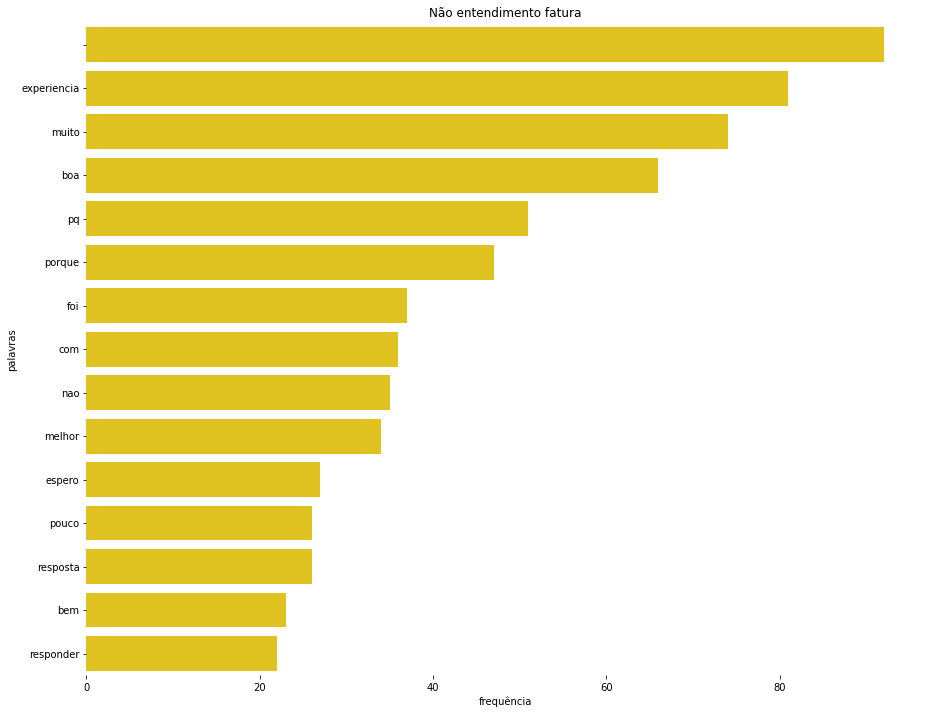

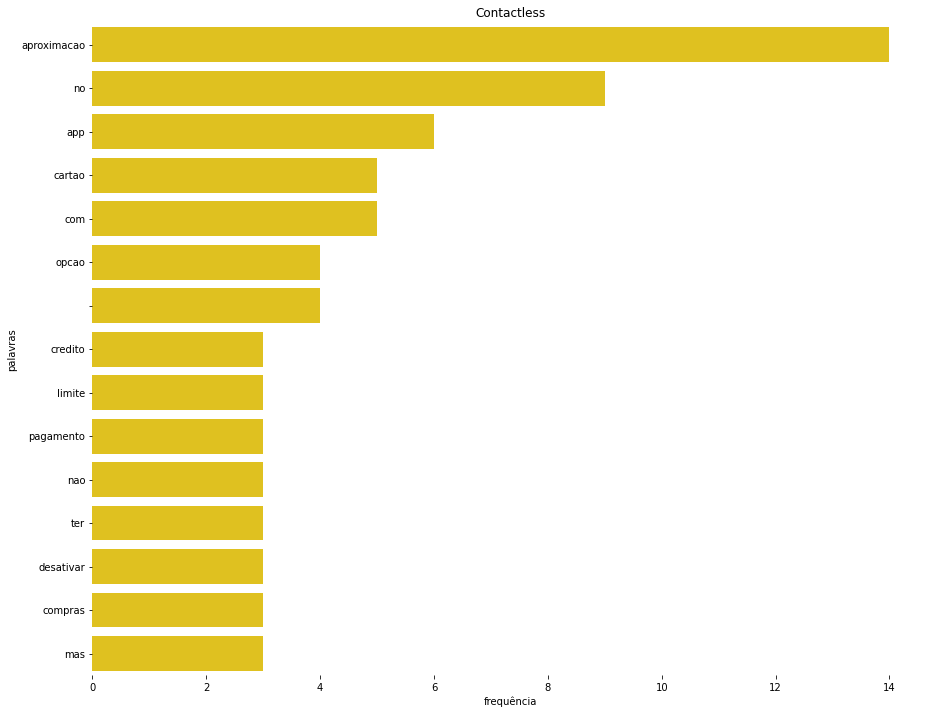

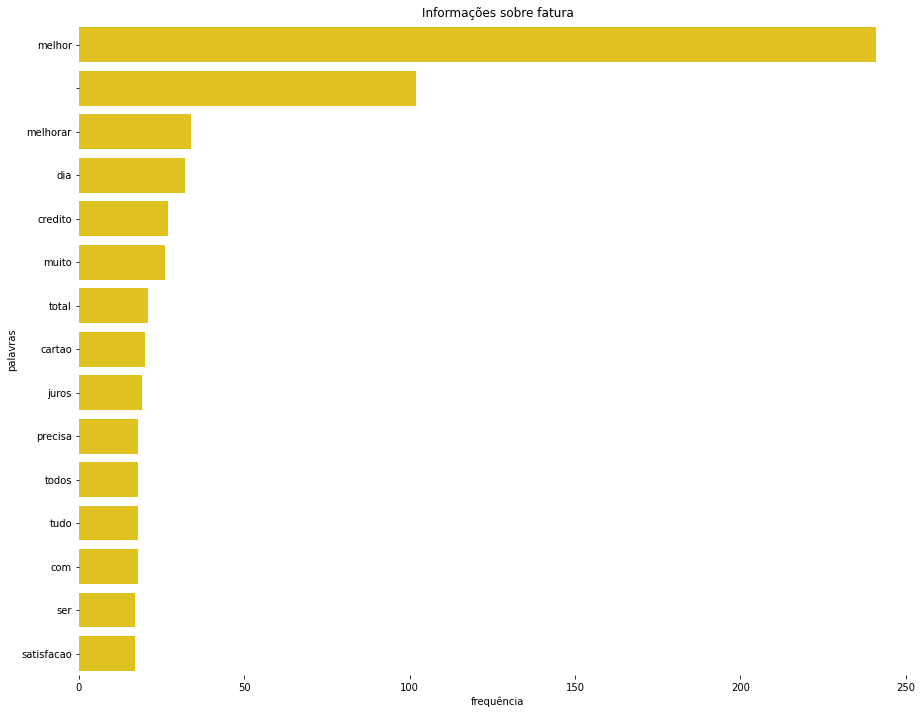

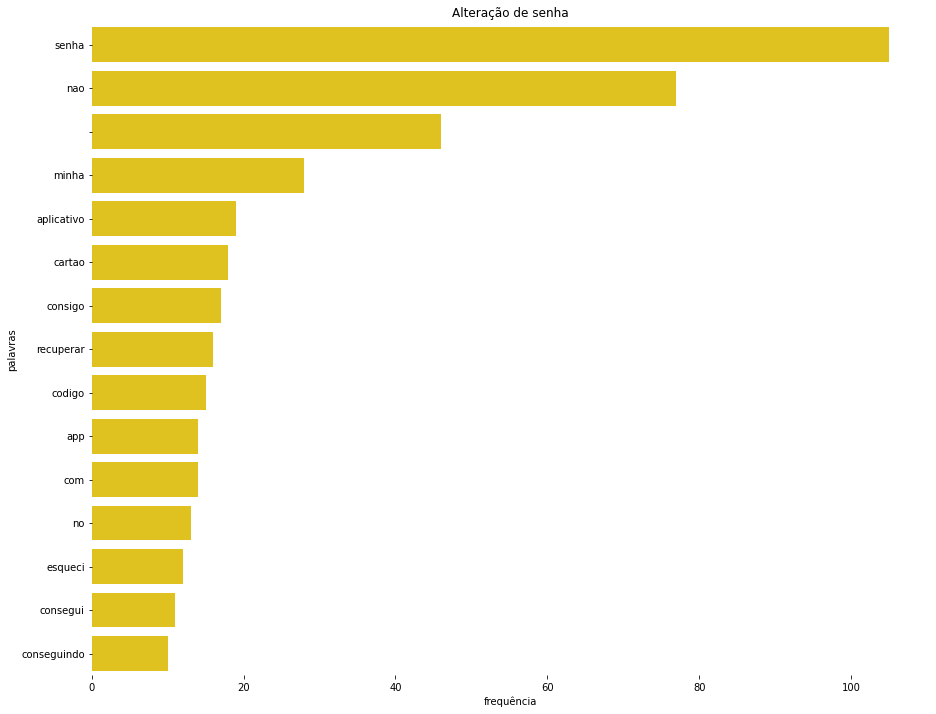

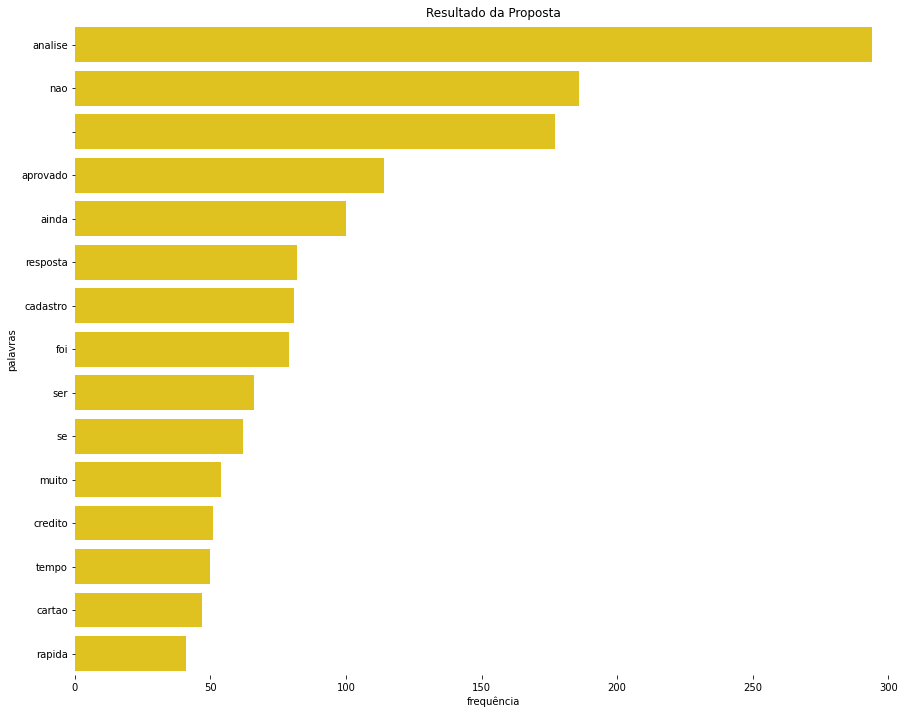

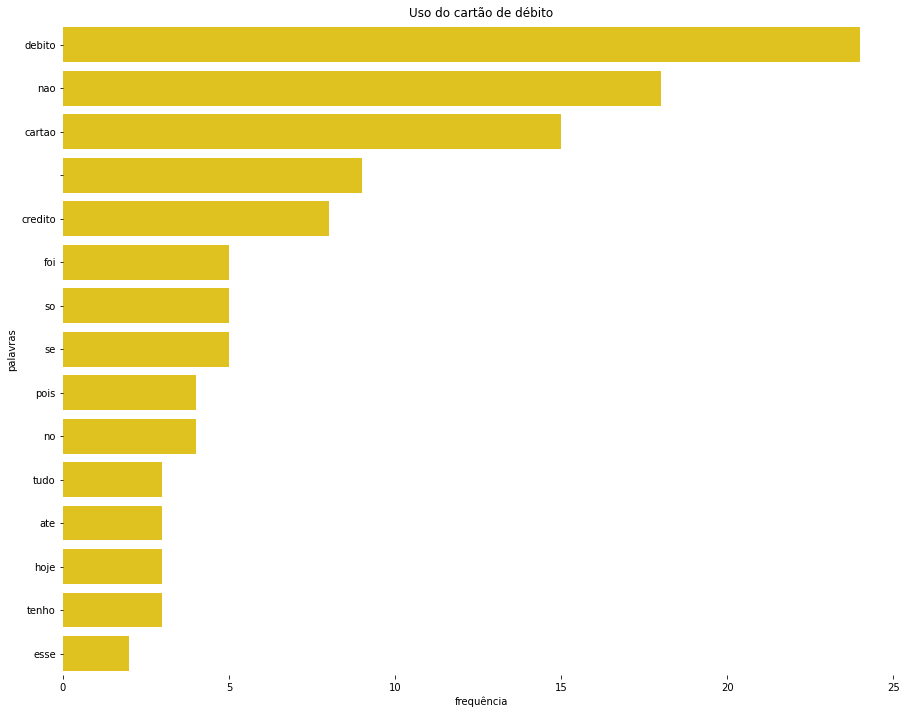

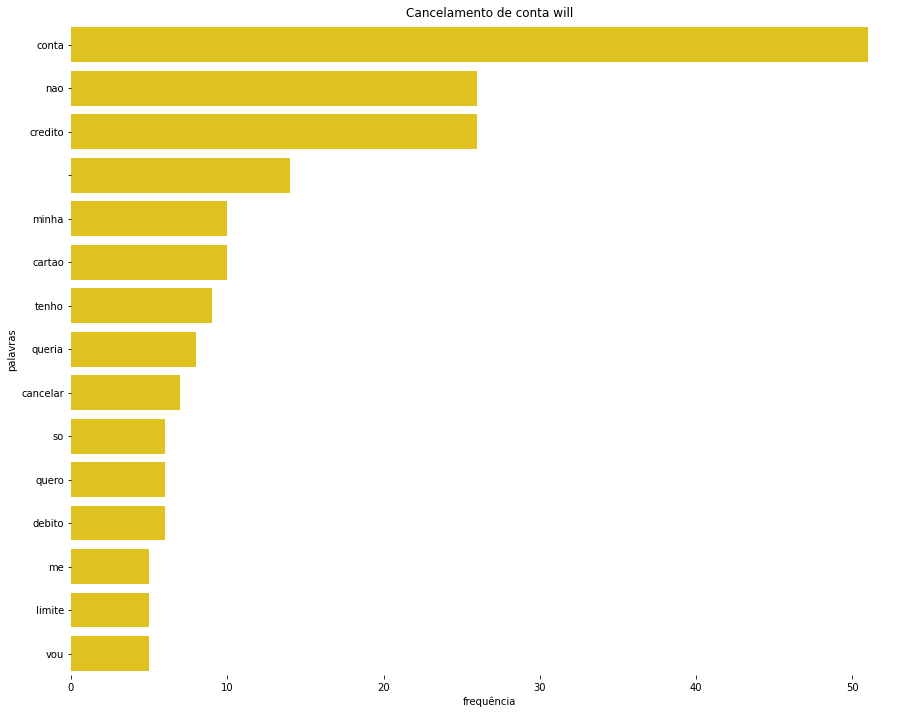

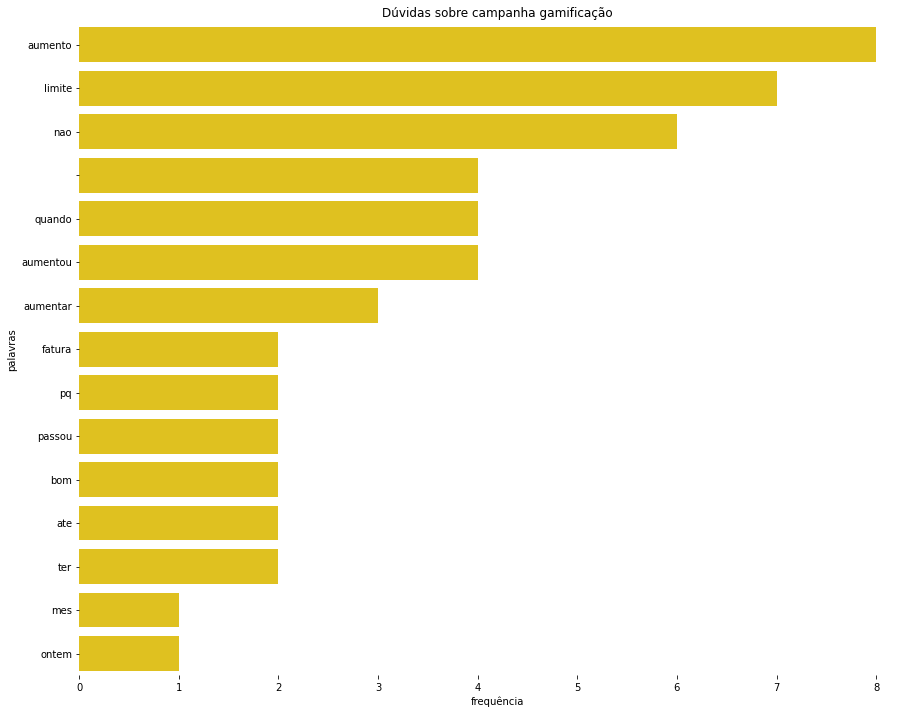

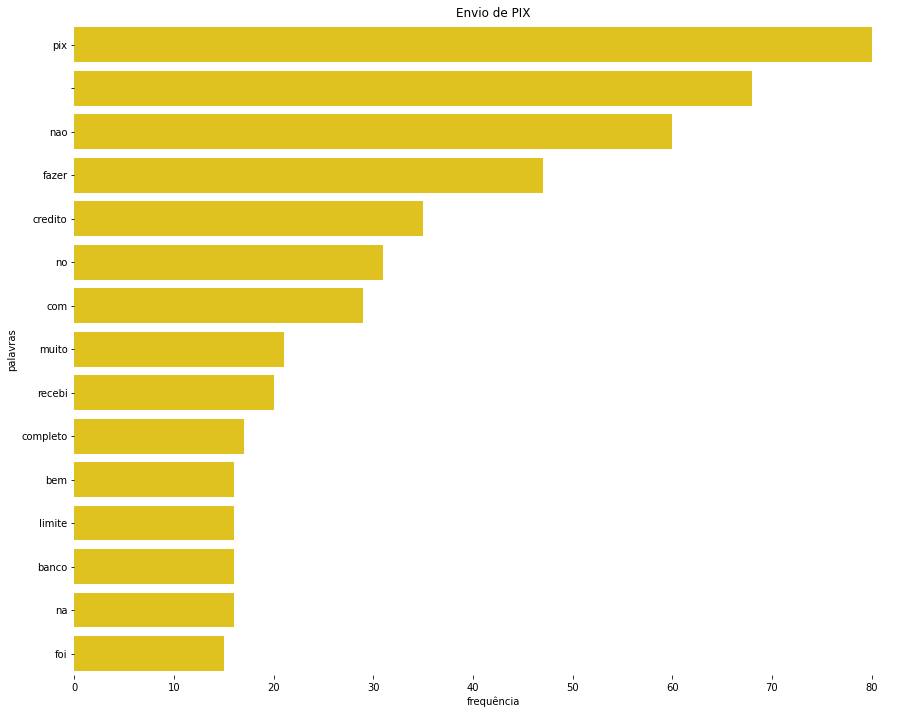

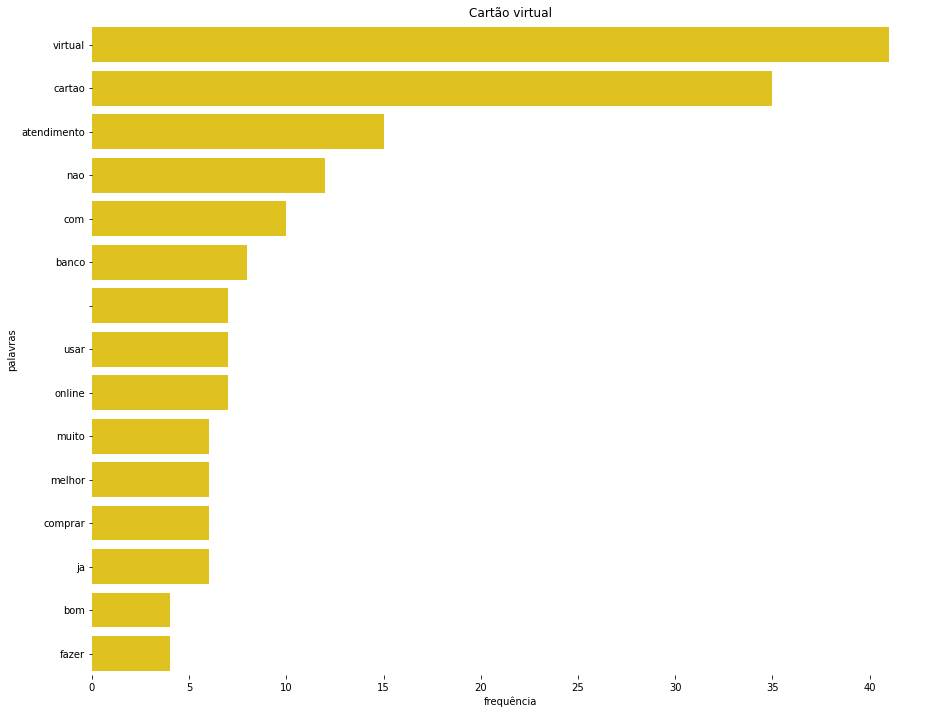

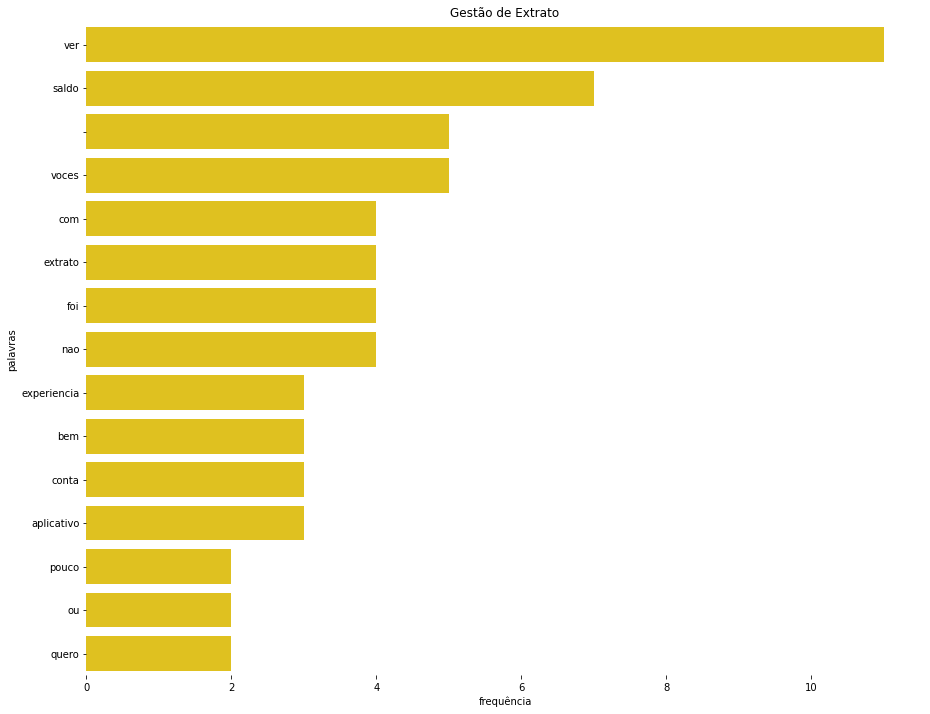

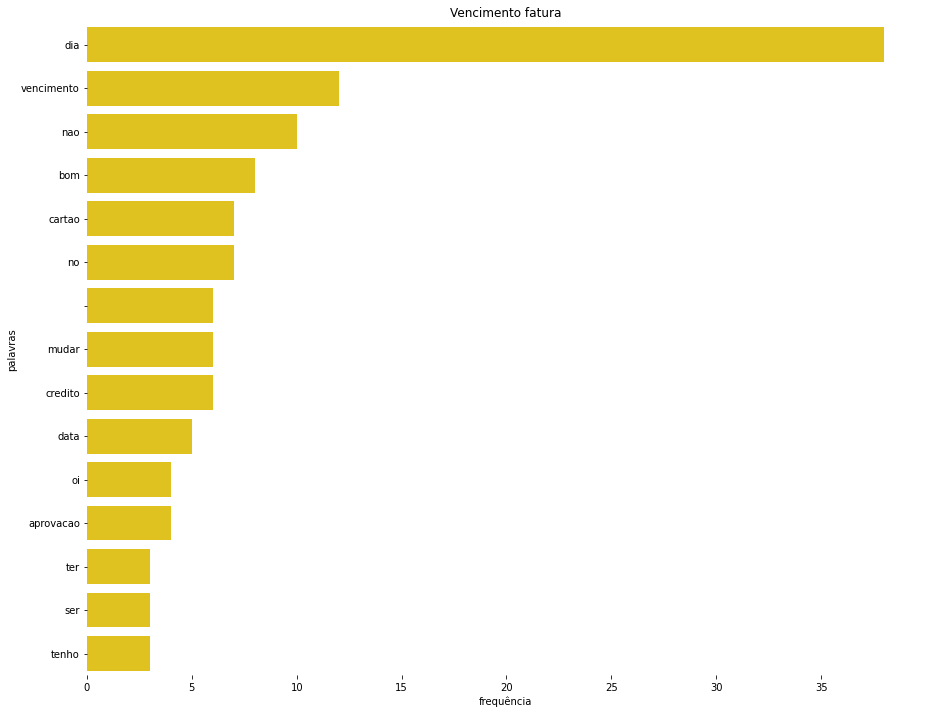

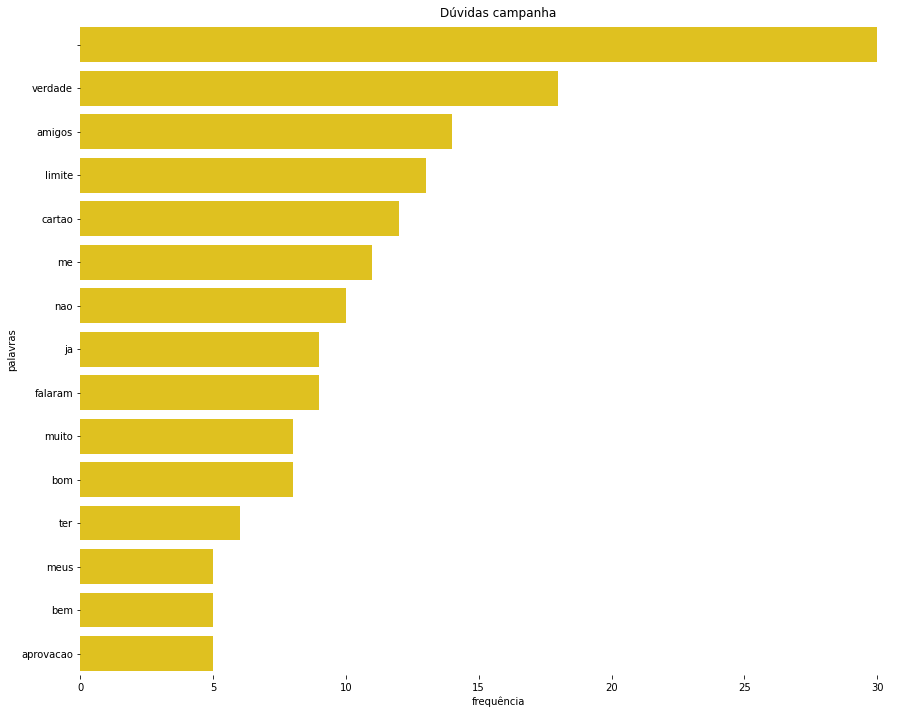

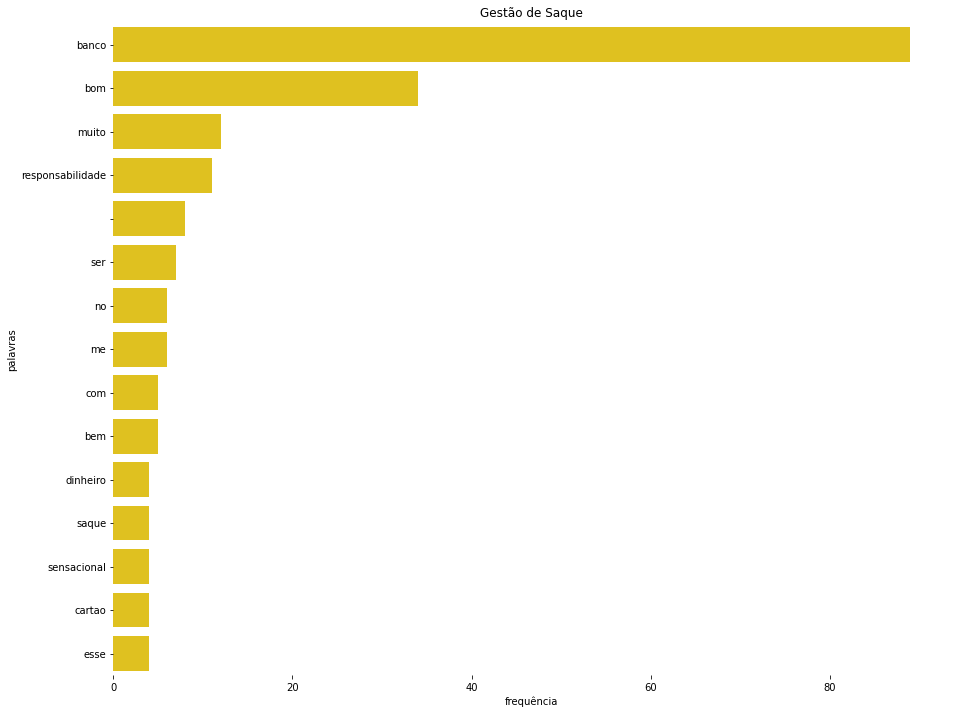

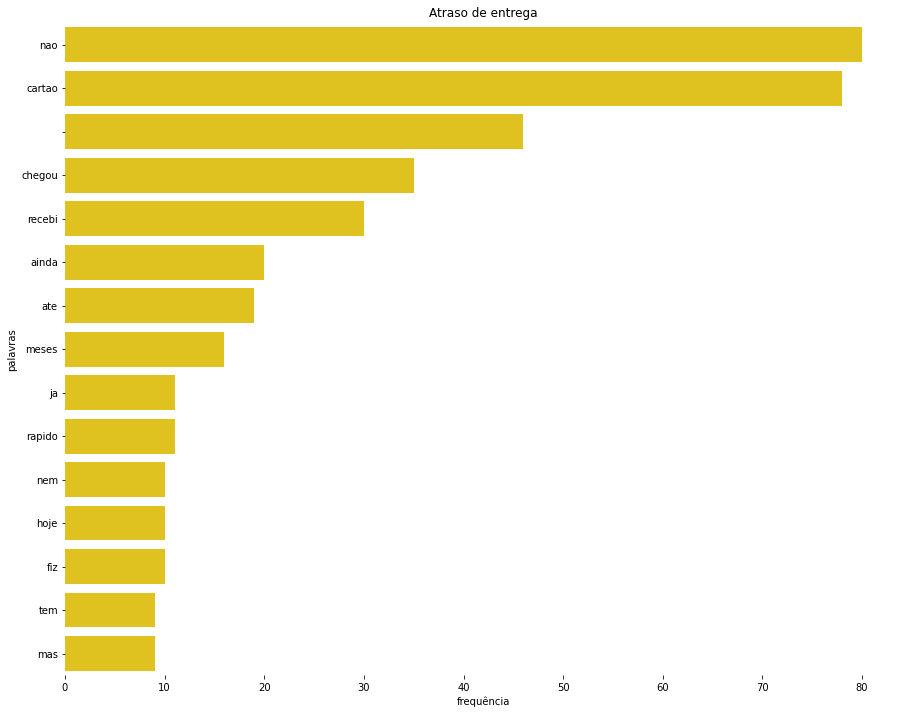

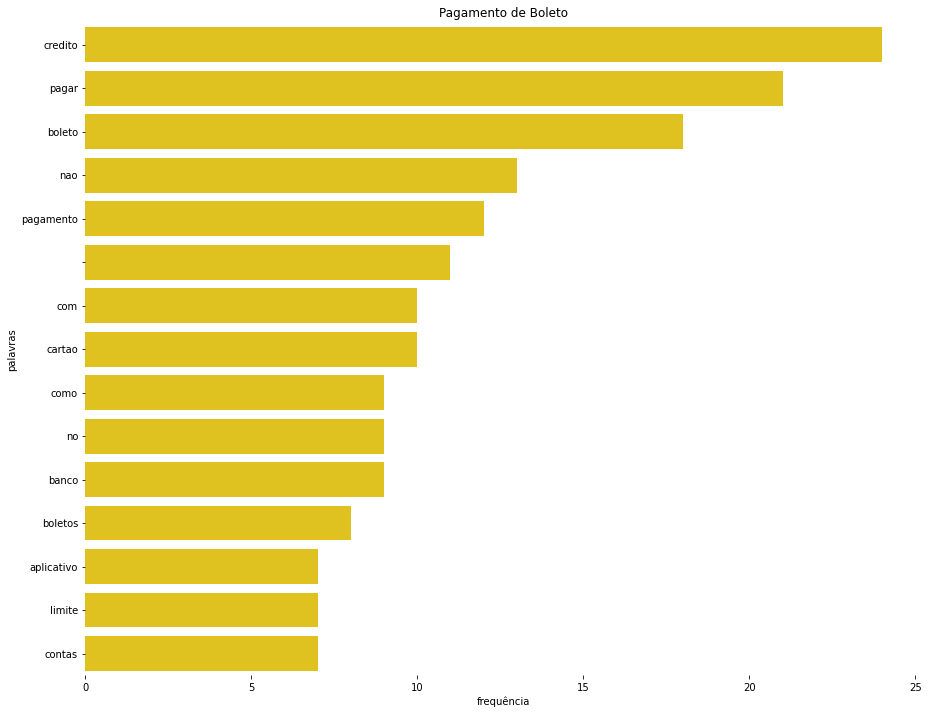

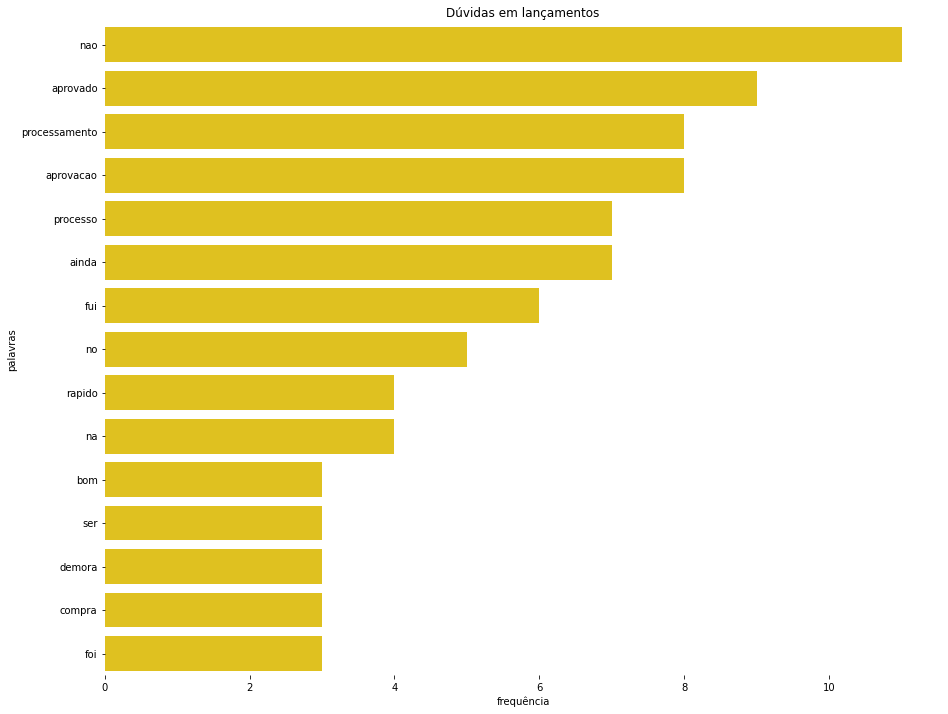

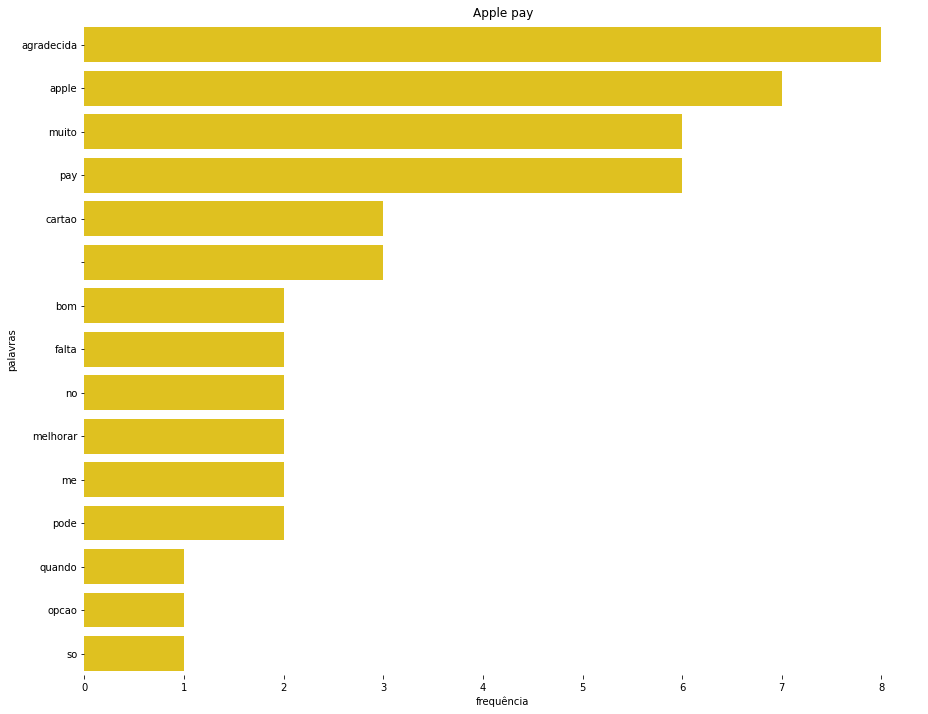

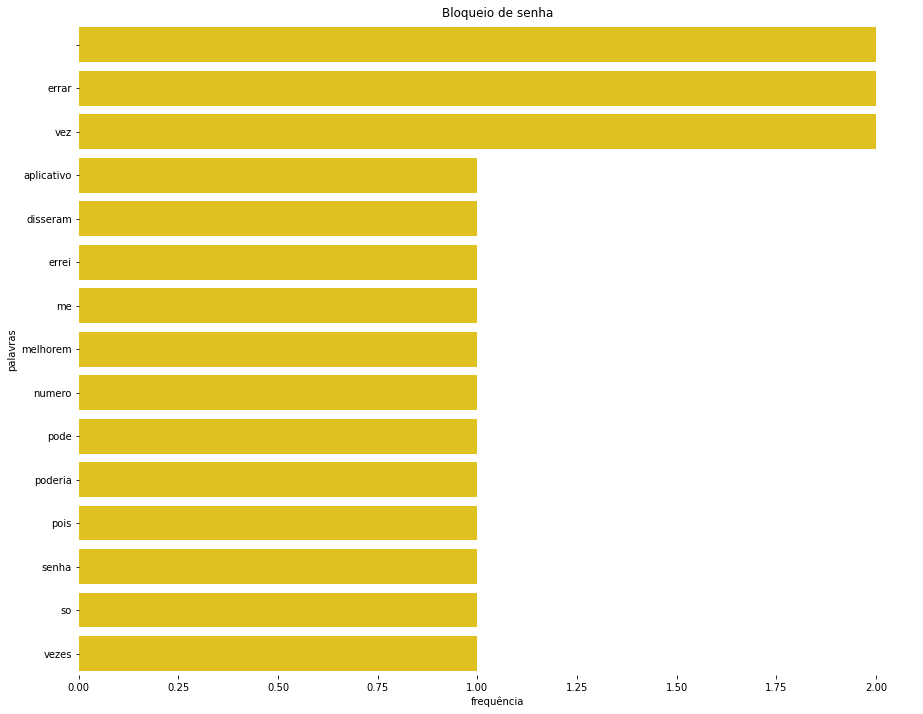

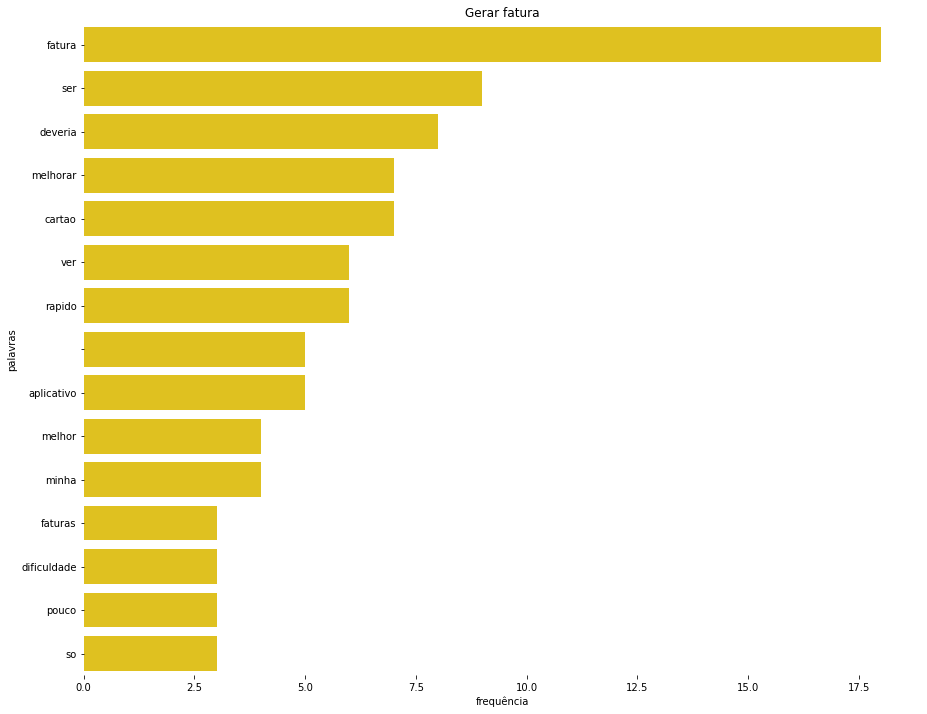

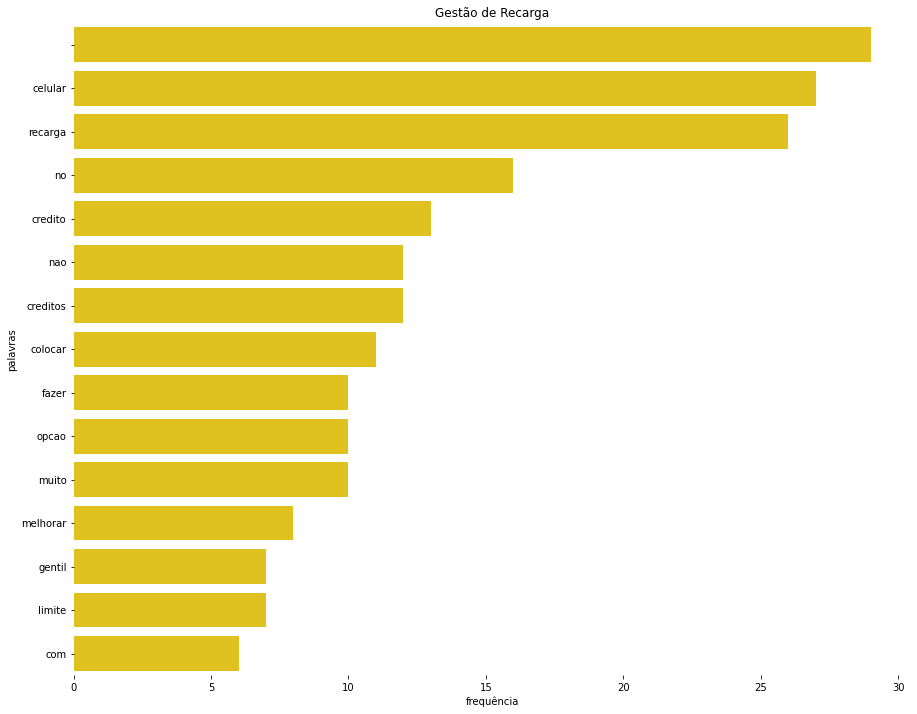

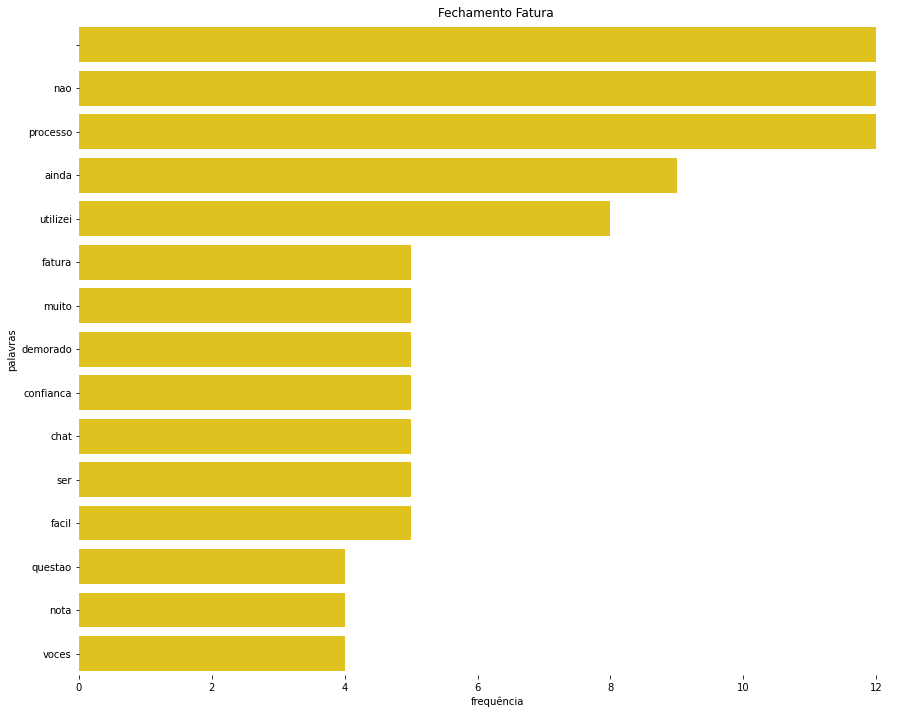

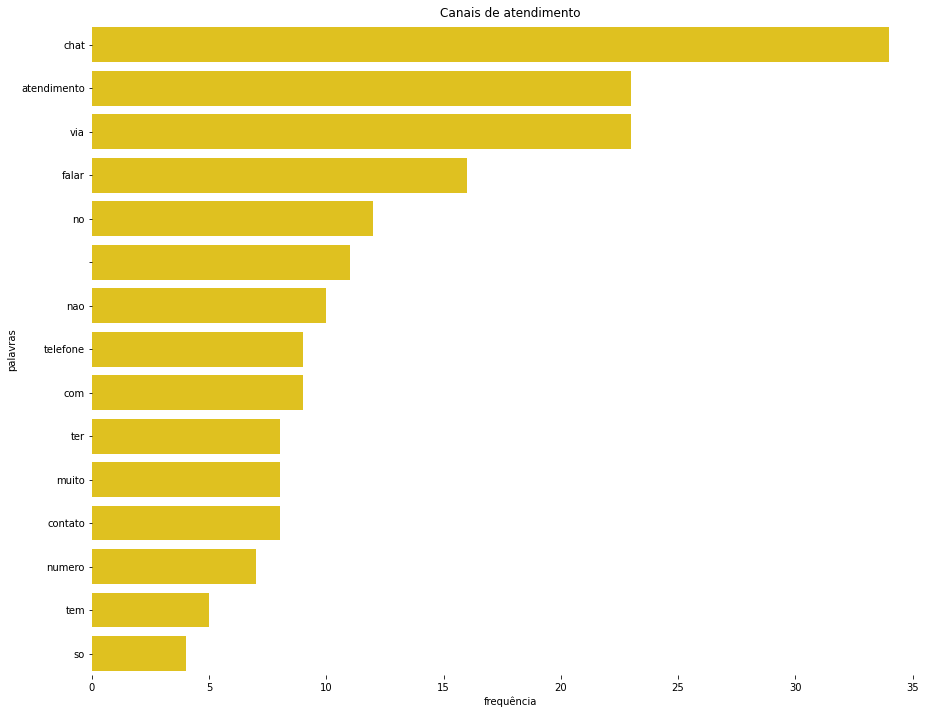

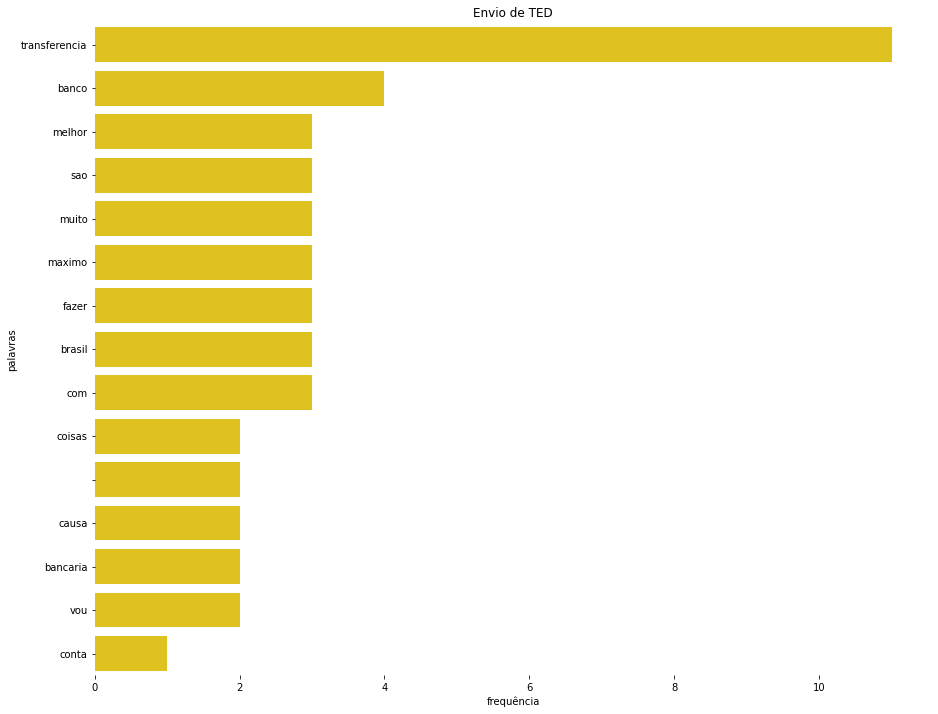

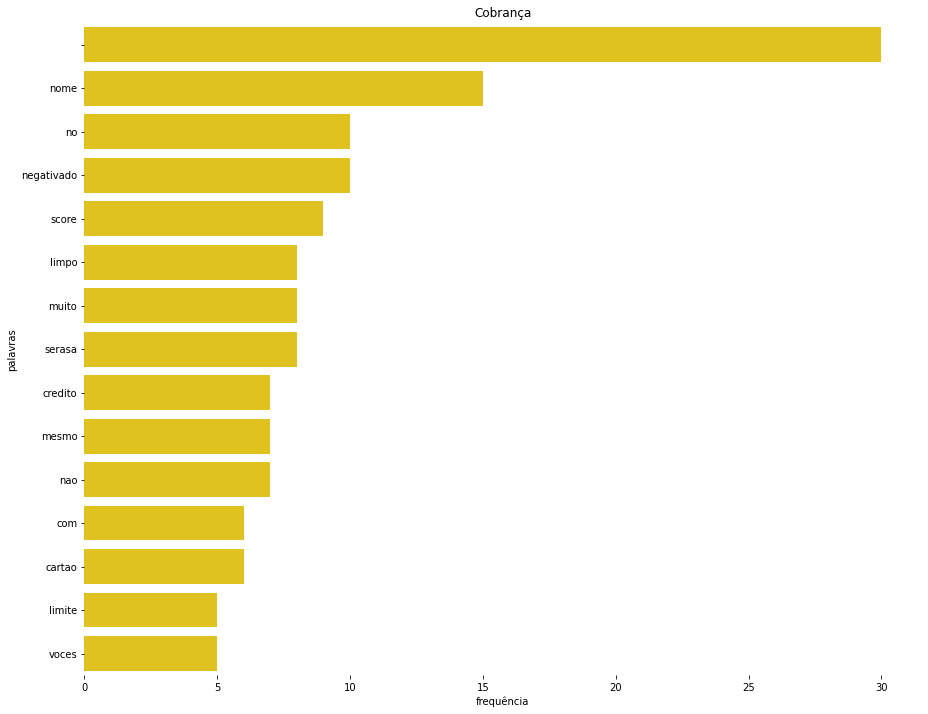

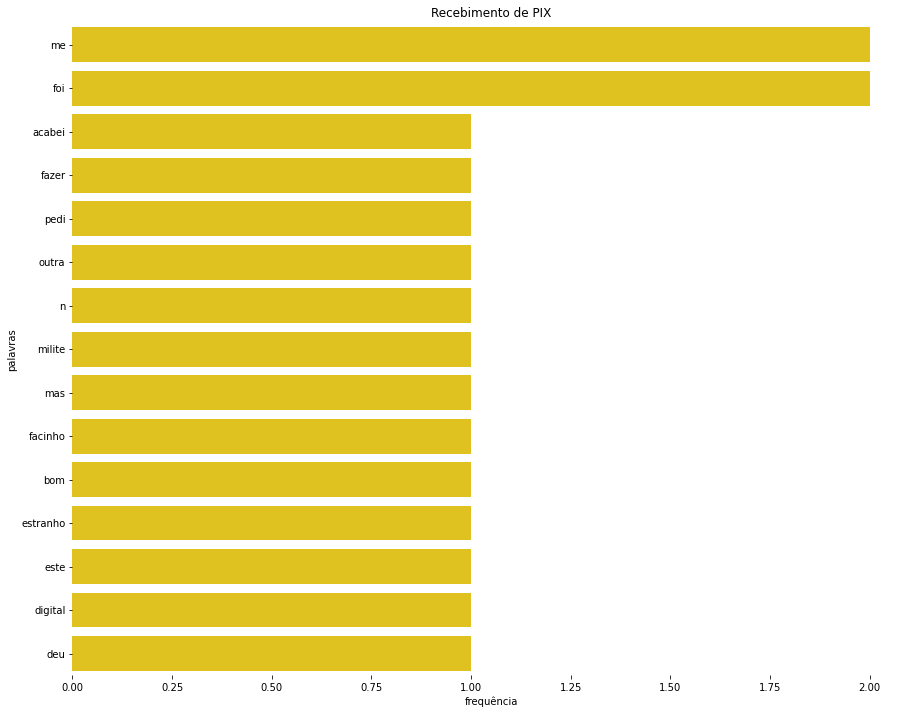

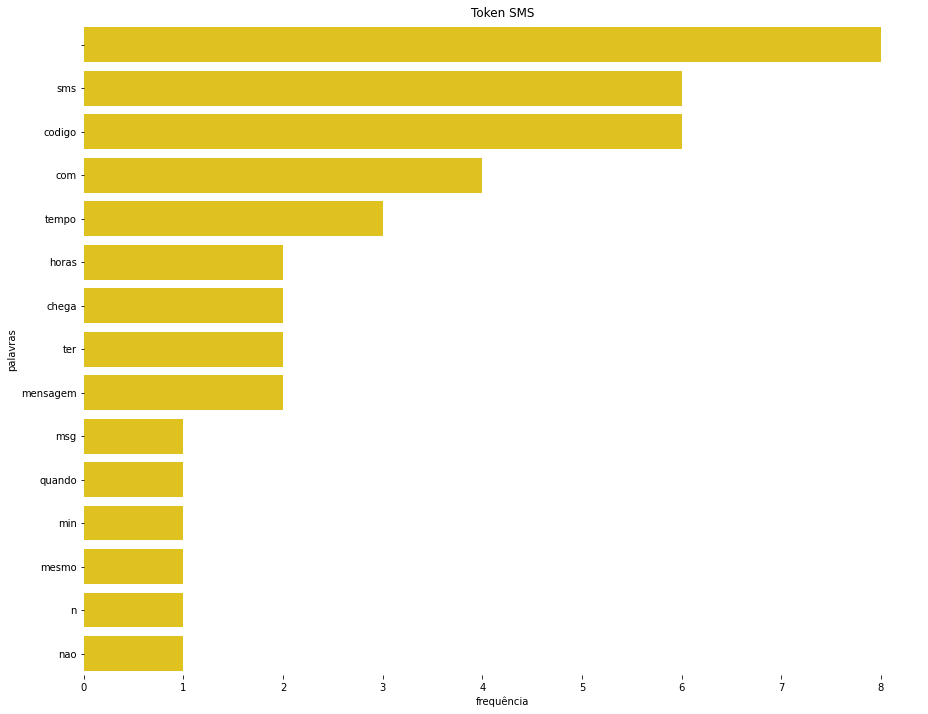

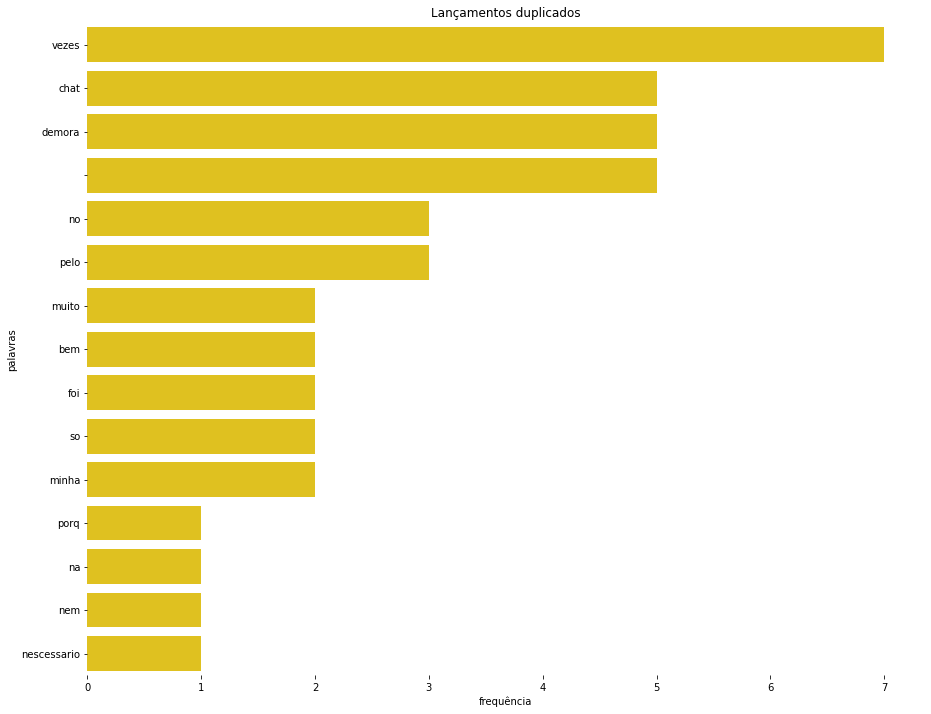

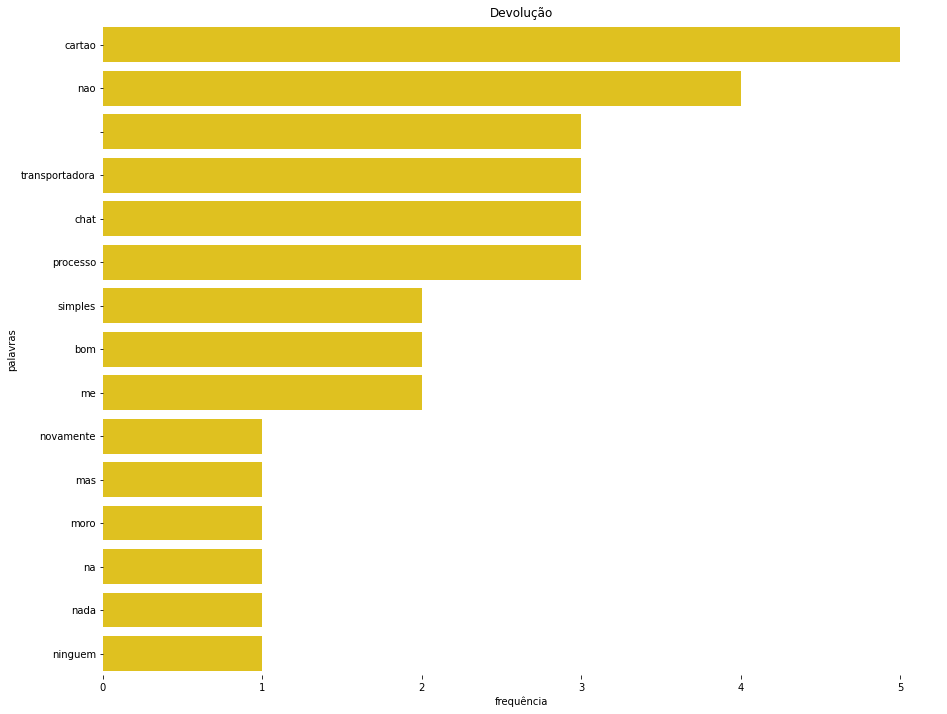

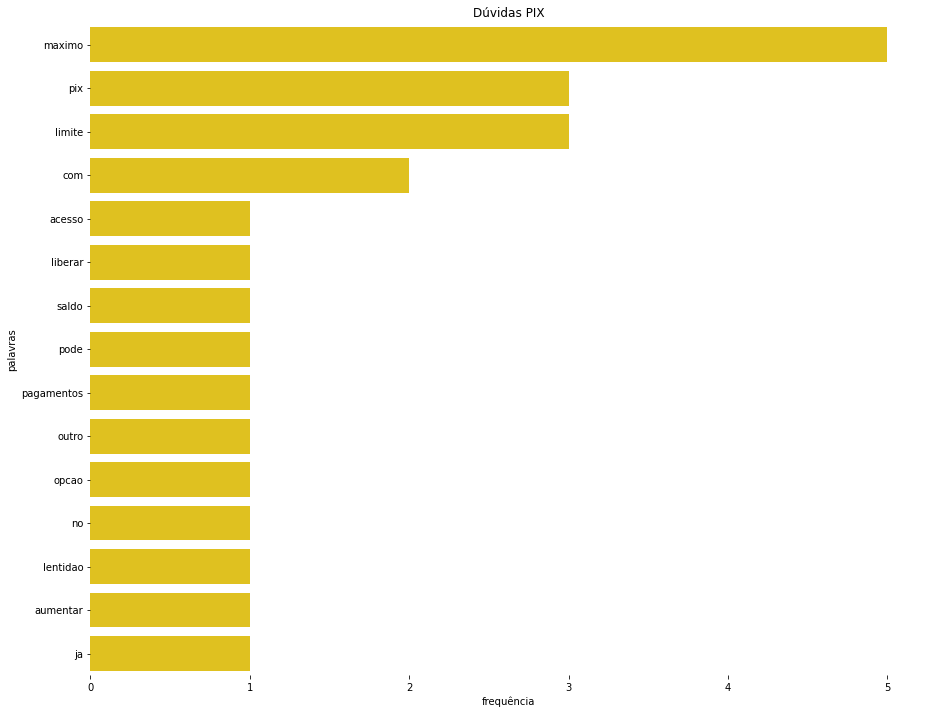

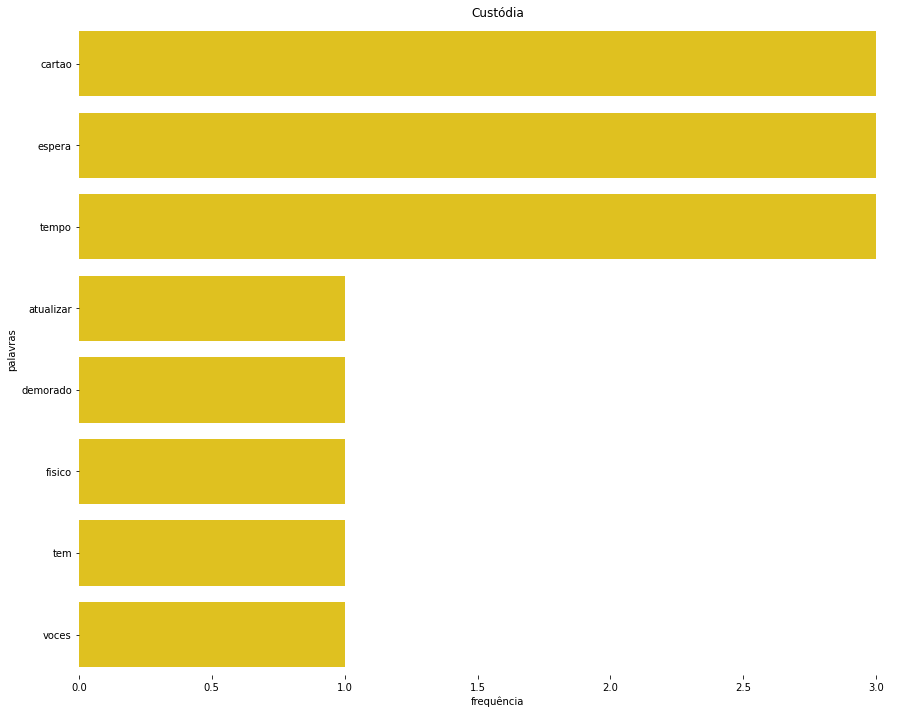

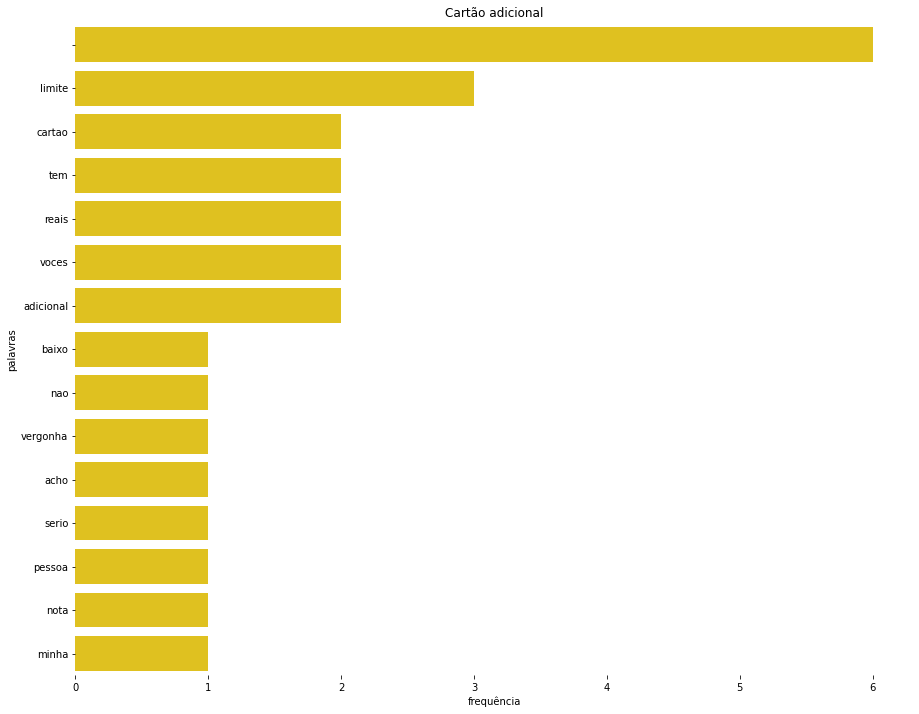

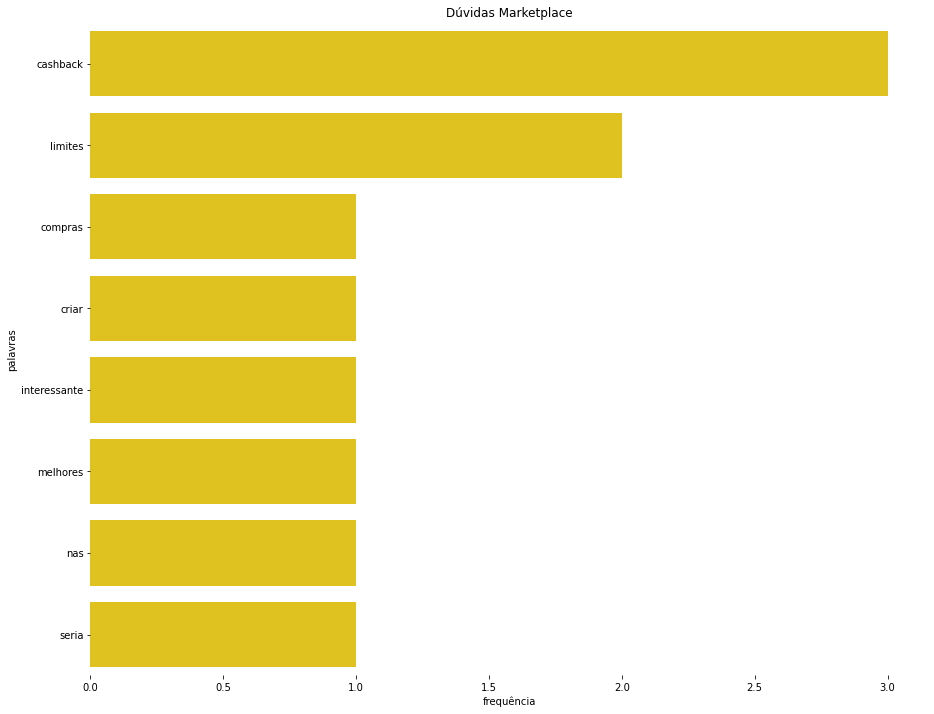

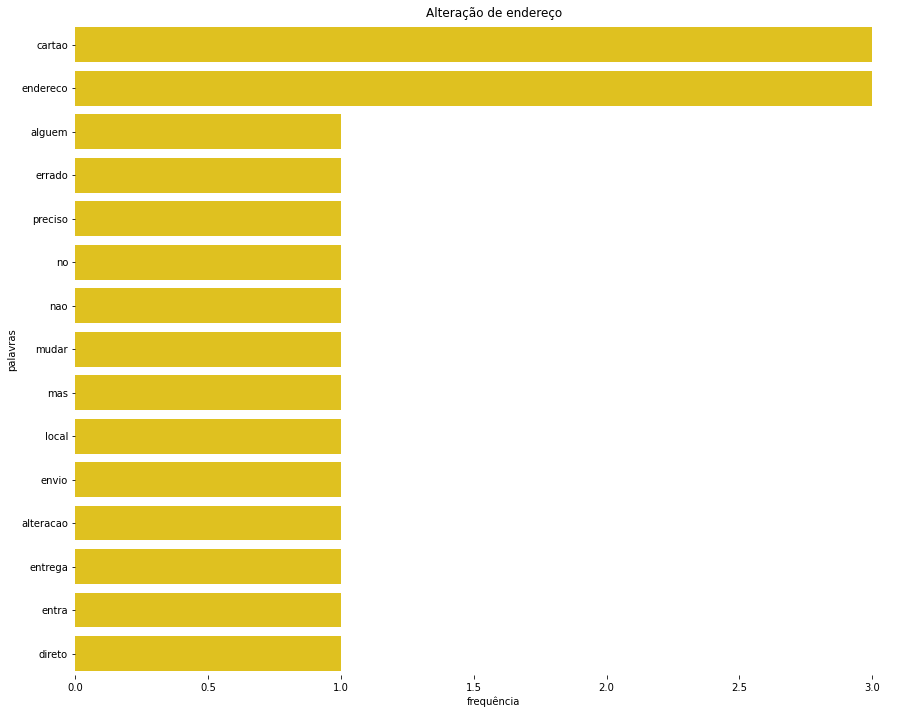

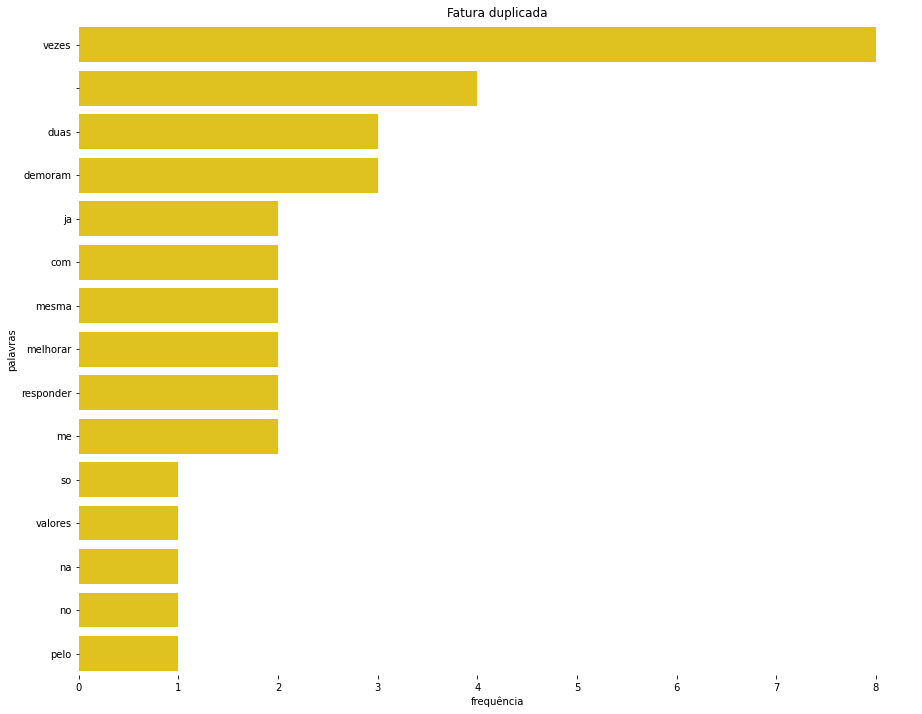

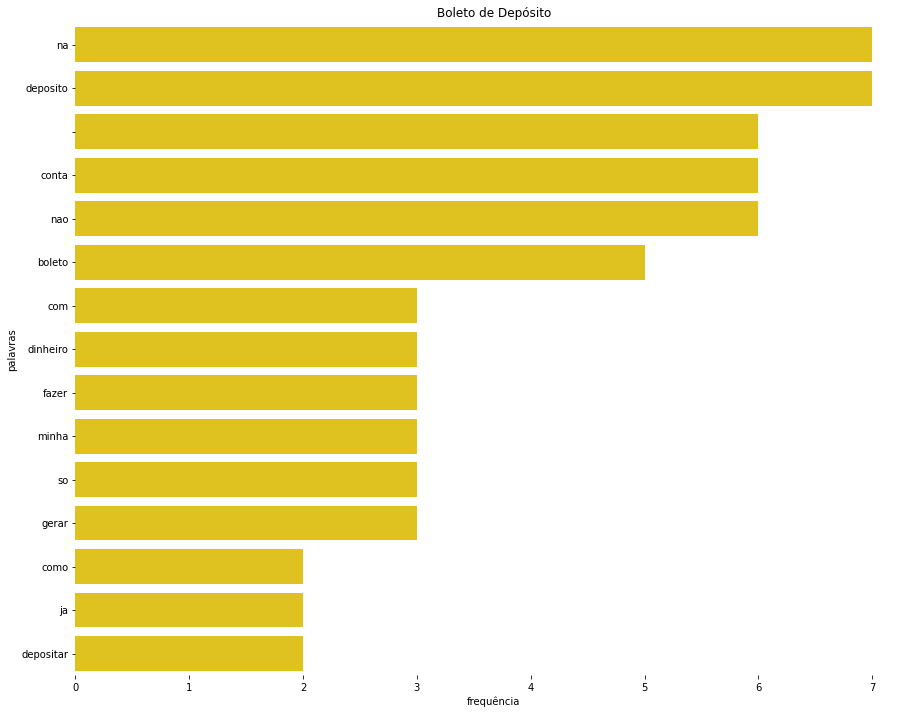

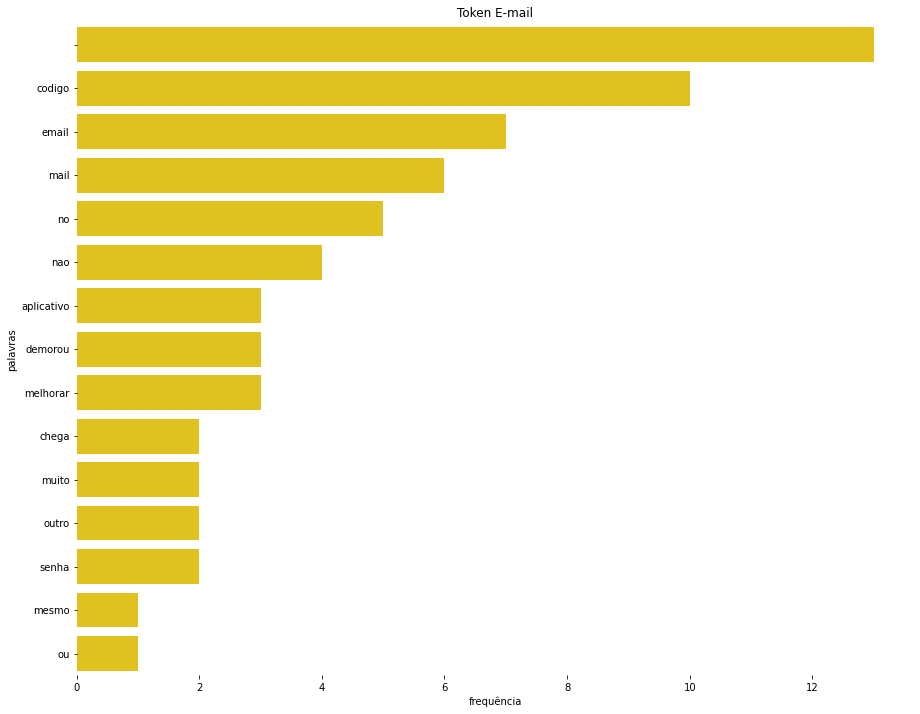

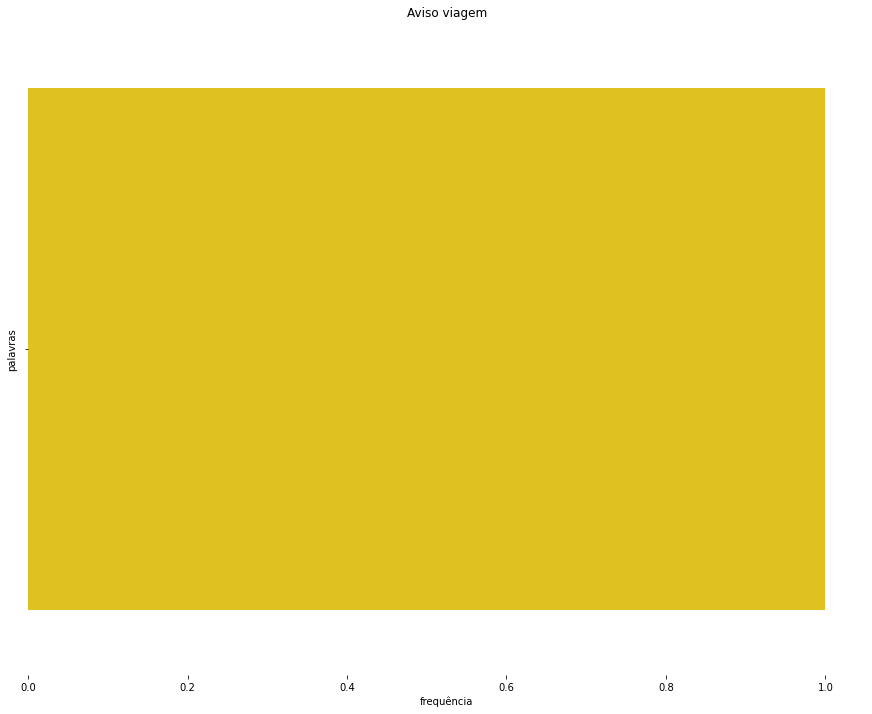

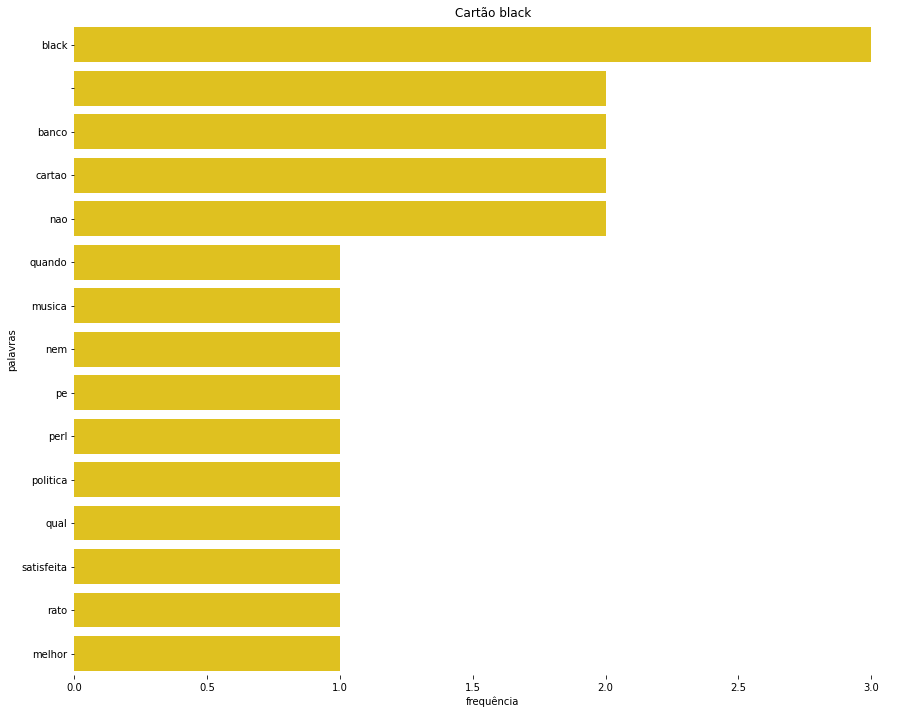

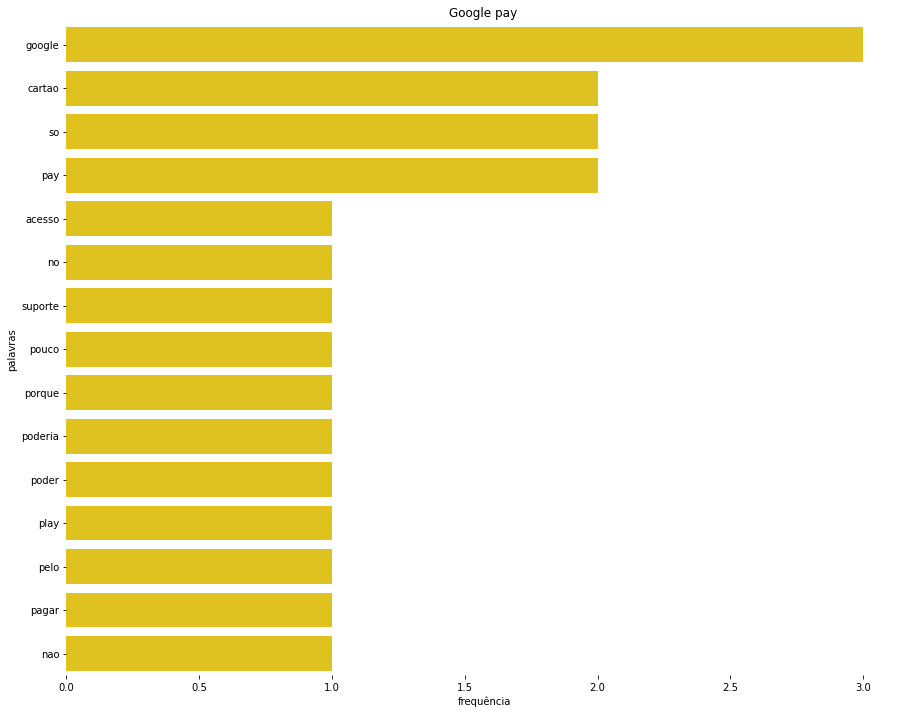

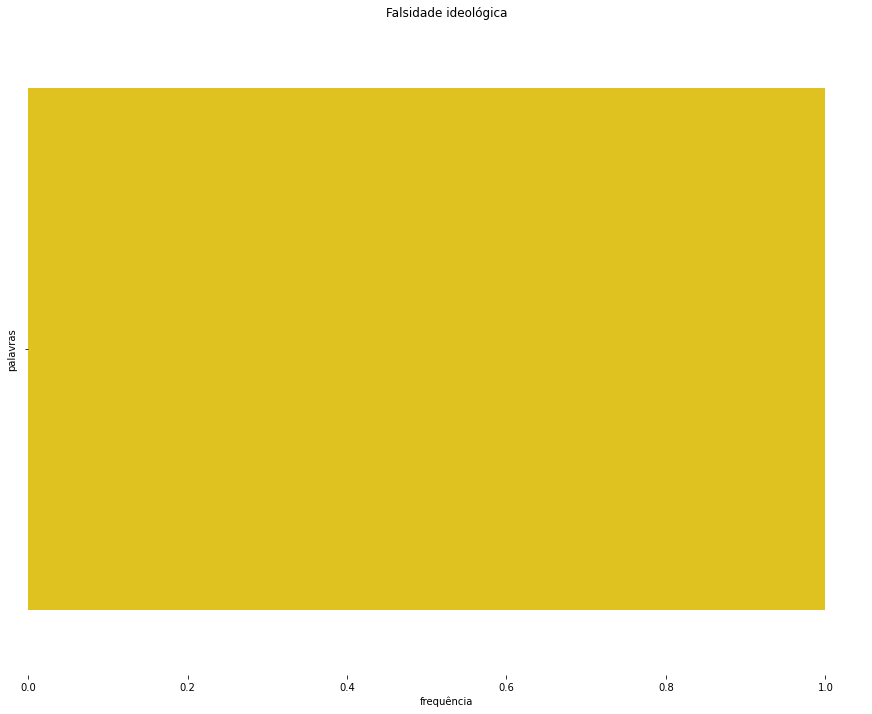

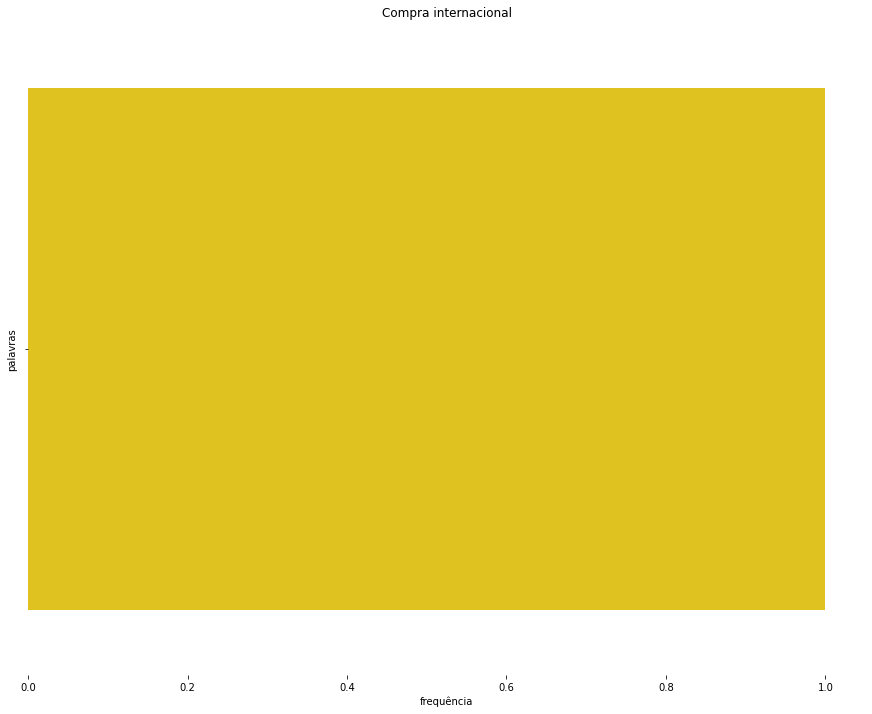

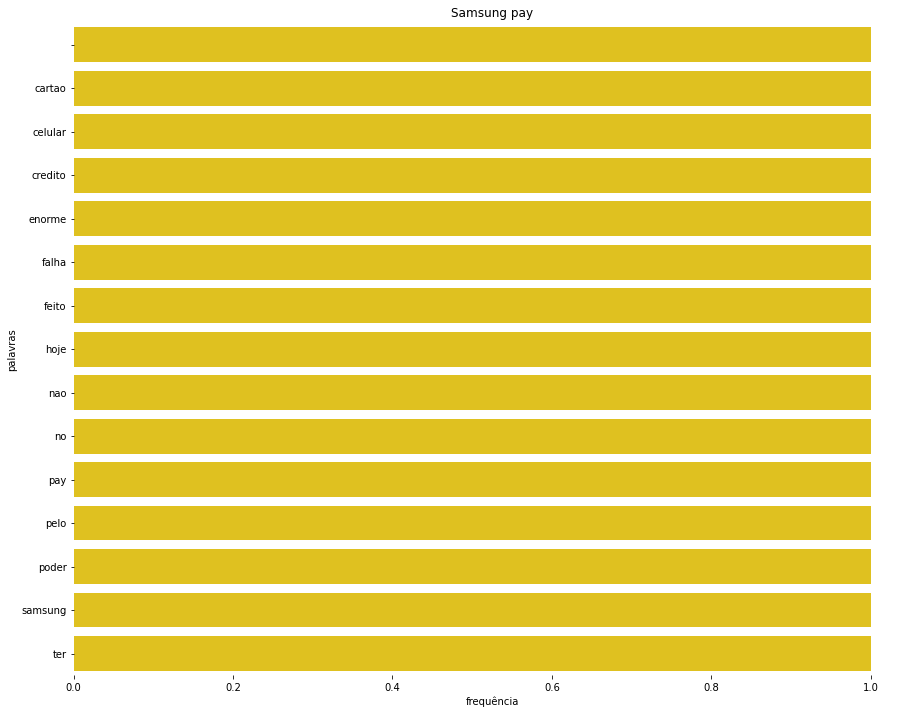

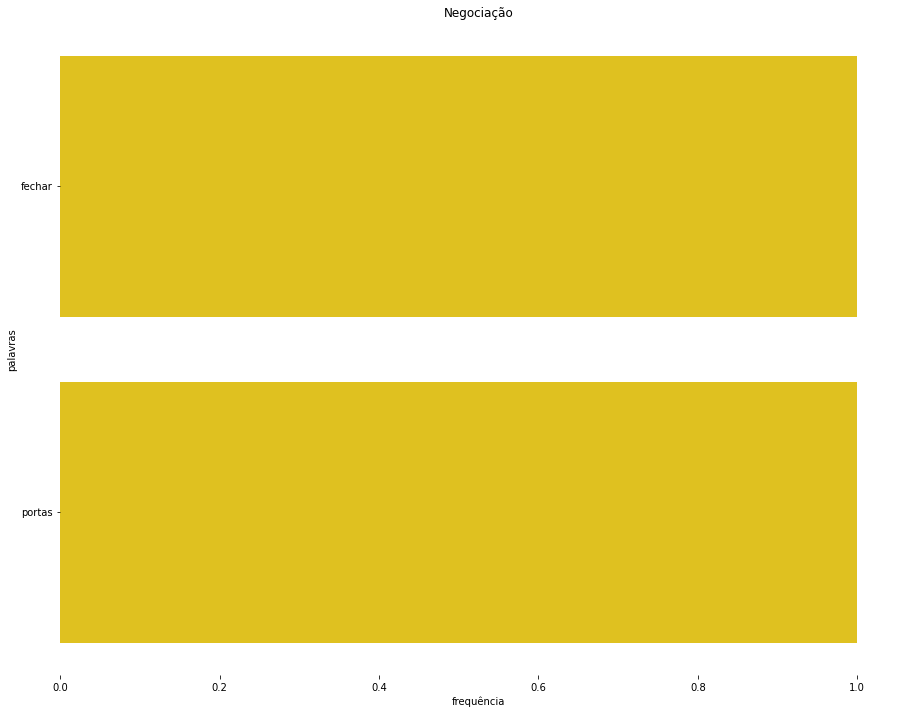

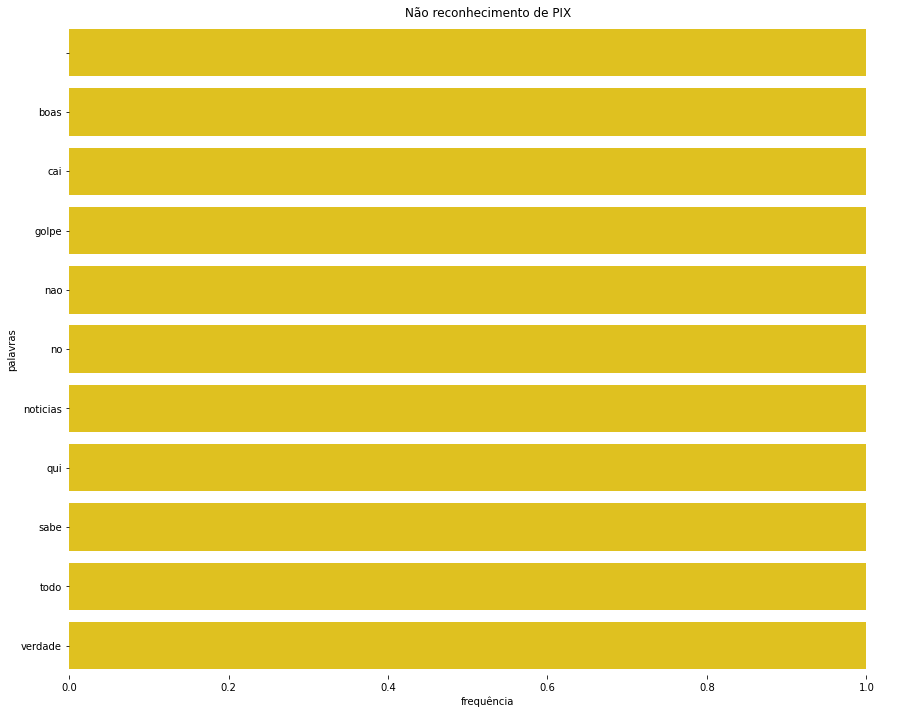

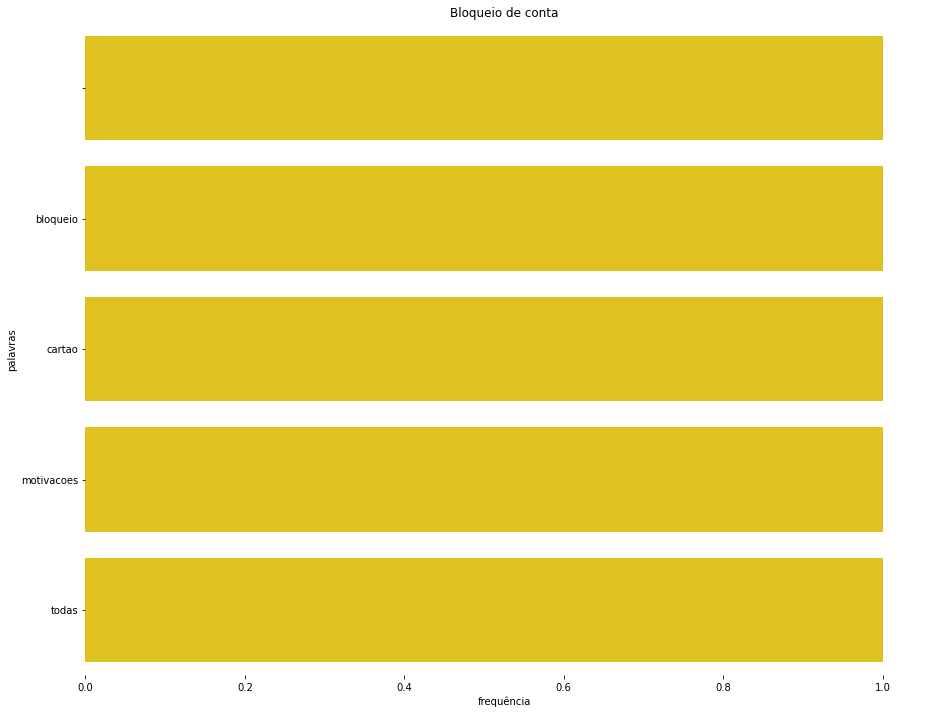

In [39]:
for i in nps_clean.tag_top_1.unique():
    texto = nps_clean[nps_clean.Tag_Clean == i]['text_clean']
    all_other = " ".join(s for s in texto)
    list_all_name_clean = all_other.split(' ')
    list_all_name_clean2 = [palavra for palavra in list_all_name_clean if palavra.lower() not in stopwords_will]
    df_words = pd.DataFrame(list_all_name_clean2, columns=['words'])
    df_count = df_words.value_counts().to_frame()
    df_count.reset_index(inplace = True)
    df_count.rename(columns={0:'frequência', 'words':'palavras'}, inplace=True)
    top15 = df_count.iloc[:15]
    ax = sns.barplot(x='frequência',y='palavras', data=top15, color = 'gold').set_title(i)
    ax.figure.set_size_inches(15, 12)
    sns.despine(left=True, bottom=True)
    plt.show()